# Water Quality Data Analysis

This notebook performs comprehensive data processing on water quality data according to the following steps:

1. **Convert the data file into an Excel file. Merge all the data into a single data file.**
2. **Since the parameters are recorded as Min-Max ranges, compute the average value for each parameter.**
3. **Drop or handle missing/null or non-numeric entries if any.**
4. **Display the shape and summary statistics of the cleaned dataset.**


In [9]:
pip install pandas

  Using cached pandas-2.3.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.2-cp311-cp311-win_amd64.whl (11.3 MB)
   ---------------------------------------- 0.0/13.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.1 MB ? eta -:--:--
    --------------------------------------- 0.3/13.1 MB ? eta -:--:--
    --------------------------------------- 0.3/13.1 MB ? eta -:--:--
    --------------------------------------- 0.3/13.1 MB ? eta -:--:--
    --------------------------------------- 0.3/13.1 MB ? eta -:--:--
    --------------------------------------- 0.3/13.1 MB ? eta -:--:--
    --------------------------------------- 0.3/13.1 MB ? eta -:--:--
    --------------------------------------- 0.3/13.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.1 MB 164.5 kB/s eta 0:01:17
   -- -------------------

In [10]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install matplotlib

  Using cached matplotlib-3.10.6-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp311-cp311-win_amd64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp311-cp311-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.6-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.2-cp311-cp311-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl (73 kB)
Using cached pillow-11.3.0-cp311-cp311-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ---------------------------------------- 0/7 [pyparsing]
   -

In [20]:
pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------

In [17]:
pip install warnings

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")


Libraries imported successfully!


## Step 1: Load and Examine the Data

First, let's load the Excel file and examine its structure.


In [21]:
# Load the Excel file
df = pd.read_excel('FINAL_WATER_QUALITY_GP1.xlsx')

print("Dataset loaded successfully!")
print(f"Shape of the dataset: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\nColumn names:")
print(df.columns.tolist())


Dataset loaded successfully!
Shape of the dataset: (446, 30)
Number of rows: 446
Number of columns: 30

Column names:
['Station Code', 'Monitoring Location', 'State', 'Temperature Min', 'Temperature Max', 'Temperature Average', 'DO Min', 'DO Max', 'DO Average', 'pH Min', 'pH Max', 'pH Average', 'Conductivity Min', 'Conductivity Max', 'Conductivity Average', 'BOD Min', 'BOD Max', 'BOD  Average', 'Nitrate Min', 'Nitrate Max', 'Nitrate Average', 'Fecal Coliform Min', 'Fecal Coliform Max', 'Fecal Coliform Average', 'Total Coliform Min', 'Total Coliform Max', 'Total Coliform Average', 'Fecal Streptococci Min', 'Fecal Streptococci Max', 'Fecal Streptococci Average']


In [22]:
# Display first few rows of the dataset
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,Station Code,Monitoring Location,State,Temperature Min,Temperature Max,Temperature Average,DO Min,DO Max,DO Average,pH Min,pH Max,pH Average,Conductivity Min,Conductivity Max,Conductivity Average,BOD Min,BOD Max,BOD Average,Nitrate Min,Nitrate Max,Nitrate Average,Fecal Coliform Min,Fecal Coliform Max,Fecal Coliform Average,Total Coliform Min,Total Coliform Max,Total Coliform Average,Fecal Streptococci Min,Fecal Streptococci Max,Fecal Streptococci Average
0,3132,"RIVER BAGMATI AT MUZAFFARPUR- SITAMARHI ROAD\nBRIDGE, SITAMARHI",BIHAR,19.0,30.0,24.5,7.1,9.8,8.45,7.3,8.2,7.75,236.0,359.0,297.5,1.0,2.2,1.60,0.3,0.30,0.300,170.0,54000.0,27085,790.0,92000.0,46395,NaN,NaN,#DIV/0!
1,3135,"RIVER BAGMATI AT DARBHANGA, SAMASTIPUR ROAD\nBRIDGE, DARBHANGA",BIHAR,21.0,30.0,25.5,5.9,9.5,7.70,7.5,8.4,7.95,168.0,372.0,270,1.0,2.9,1.95,0.3,0.30,0.300,1300.0,35000.0,18150,2400.0,92000.0,47200,NaN,NaN,#DIV/0!
2,2562,"RIVER BURHI GANDAK AT AKHARAGHAT, MUZAFFARPUR",BIHAR,18.0,32.0,25.0,6.5,9.2,7.85,7.3,8.1,7.70,201.0,456.0,328.5,1.0,2.6,1.80,0.3,0.33,0.315,2300.0,92000.0,47150,3300.0,160000.0,81650,NaN,NaN,#DIV/0!
3,2570,"RIVER BURHI GANDAK NEAR MAGARDAHI GHAT AT\nSAMASTIPUR ROAD BRIDGE, SAMASTIPUR",BIHAR,22.0,38.0,30.0,6.5,9.8,8.15,7.2,8.5,7.85,219.0,402.0,310.5,1.0,2.6,1.80,0.3,0.30,0.300,3300.0,92000.0,47650,4900.0,160000.0,82450,NaN,NaN,#DIV/0!
4,3124,RIVER BURHI GANDAK U/S ROAD BRIDGE NH NEAR ZERO MILE MUZAFFARPUR,BIHAR,18.0,33.0,25.5,6.8,9.1,7.95,7.2,8.0,7.60,198.0,447.0,322.5,1.0,2.8,1.90,0.3,0.30,0.300,1300.0,92000.0,46650,2300.0,160000.0,81150,NaN,NaN,#DIV/0!


In [23]:
# Check data types
print("Data types:")
print(df.dtypes)

print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Data types:
Station Code                    int64
Monitoring Location            object
State                          object
Temperature Min               float64
Temperature Max               float64
Temperature Average           float64
DO Min                        float64
DO Max                        float64
DO Average                    float64
pH Min                        float64
pH Max                        float64
pH Average                    float64
Conductivity Min              float64
Conductivity Max              float64
Conductivity Average           object
BOD Min                       float64
BOD Max                       float64
BOD  Average                  float64
Nitrate Min                   float64
Nitrate Max                   float64
Nitrate Average               float64
Fecal Coliform Min            float64
Fecal Coliform Max            float64
Fecal Coliform Average         object
Total Coliform Min            float64
Total Coliform Max            float64


## Step 2: Calculate Average Values for Min-Max Range Parameters

The dataset contains parameters recorded as Min-Max ranges. We need to compute the average value for each parameter where this hasn't been done already.


In [24]:
# Identify parameters with Min-Max ranges
parameter_pairs = [
    ('Temperature Min', 'Temperature Max', 'Temperature Average'),
    ('DO Min', 'DO Max', 'DO Average'),
    ('pH Min', 'pH Max', 'pH Average'),
    ('Conductivity Min', 'Conductivity Max', 'Conductivity Average'),
    ('BOD Min', 'BOD Max', 'BOD  Average'),
    ('Nitrate Min', 'Nitrate Max', 'Nitrate Average'),
    ('Fecal Coliform Min', 'Fecal Coliform Max', 'Fecal Coliform Average'),
    ('Total Coliform Min', 'Total Coliform Max', 'Total Coliform Average'),
    ('Fecal Streptococci Min', 'Fecal Streptococci Max', 'Fecal Streptococci Average')
]

print("Parameters with Min-Max ranges:")
for min_col, max_col, avg_col in parameter_pairs:
    print(f"- {min_col} & {max_col} → {avg_col}")

# Create a copy of the dataframe for processing
df_processed = df.copy()


Parameters with Min-Max ranges:
- Temperature Min & Temperature Max → Temperature Average
- DO Min & DO Max → DO Average
- pH Min & pH Max → pH Average
- Conductivity Min & Conductivity Max → Conductivity Average
- BOD Min & BOD Max → BOD  Average
- Nitrate Min & Nitrate Max → Nitrate Average
- Fecal Coliform Min & Fecal Coliform Max → Fecal Coliform Average
- Total Coliform Min & Total Coliform Max → Total Coliform Average
- Fecal Streptococci Min & Fecal Streptococci Max → Fecal Streptococci Average


In [25]:
# Calculate averages for parameters where both Min and Max values are available
for min_col, max_col, avg_col in parameter_pairs:
    # Check if both min and max columns exist and have valid data
    if min_col in df_processed.columns and max_col in df_processed.columns:
        # Create a mask for rows where both min and max are not null
        valid_mask = df_processed[min_col].notna() & df_processed[max_col].notna()
        
        # Calculate average only for valid rows
        df_processed.loc[valid_mask, avg_col] = (df_processed.loc[valid_mask, min_col] + df_processed.loc[valid_mask, max_col]) / 2
        
        print(f"Calculated averages for {avg_col}: {valid_mask.sum()} valid calculations")

print("\nAverage calculation completed!")


Calculated averages for Temperature Average: 446 valid calculations
Calculated averages for DO Average: 446 valid calculations
Calculated averages for pH Average: 446 valid calculations
Calculated averages for Conductivity Average: 397 valid calculations
Calculated averages for BOD  Average: 446 valid calculations
Calculated averages for Nitrate Average: 446 valid calculations
Calculated averages for Fecal Coliform Average: 370 valid calculations
Calculated averages for Total Coliform Average: 380 valid calculations
Calculated averages for Fecal Streptococci Average: 185 valid calculations

Average calculation completed!


## Step 3: Handle Missing/Null/Non-numeric Entries

Now we need to identify and handle missing, null, or non-numeric entries in the dataset.


In [26]:
# Check for non-numeric values in numeric columns
print("Checking for non-numeric values in the dataset...")

# Identify numeric columns (excluding text columns)
numeric_columns = df_processed.select_dtypes(include=[np.number]).columns.tolist()
text_columns = ['Station Code', 'Monitoring Location', 'State']

print(f"Numeric columns: {len(numeric_columns)}")
print(f"Text columns: {text_columns}")

# Check for non-numeric values in each numeric column
non_numeric_issues = {}
for col in numeric_columns:
    if col in df_processed.columns:
        # Try to convert to numeric, coercing errors to NaN
        numeric_series = pd.to_numeric(df_processed[col], errors='coerce')
        non_numeric_count = df_processed[col].notna().sum() - numeric_series.notna().sum()
        if non_numeric_count > 0:
            non_numeric_issues[col] = non_numeric_count

if non_numeric_issues:
    print(f"\nNon-numeric values found in columns:")
    for col, count in non_numeric_issues.items():
        print(f"- {col}: {count} non-numeric values")
else:
    print("\nNo non-numeric values found in numeric columns.")


Checking for non-numeric values in the dataset...
Numeric columns: 24
Text columns: ['Station Code', 'Monitoring Location', 'State']

No non-numeric values found in numeric columns.


In [27]:
# Check for specific non-numeric patterns like #DIV/0!
print("\nChecking for specific error patterns...")

error_patterns = ['#DIV/0!', '#VALUE!', '#REF!', '#NAME?', '#N/A', '#NULL!', '#NUM!']
error_found = False

for col in df_processed.columns:
    for pattern in error_patterns:
        if df_processed[col].astype(str).str.contains(pattern, na=False).any():
            count = df_processed[col].astype(str).str.contains(pattern, na=False).sum()
            print(f"Found '{pattern}' in {col}: {count} occurrences")
            error_found = True

if not error_found:
    print("No Excel error patterns found.")



Checking for specific error patterns...
Found '#DIV/0!' in Conductivity Average: 49 occurrences
Found '#DIV/0!' in Fecal Coliform Average: 76 occurrences
Found '#DIV/0!' in Total Coliform Average: 66 occurrences
Found '#DIV/0!' in Fecal Streptococci Average: 261 occurrences


In [28]:
# Clean the data by replacing error patterns with NaN and converting to numeric
print("\nCleaning the data...")

# Replace error patterns with NaN
for col in df_processed.columns:
    if df_processed[col].dtype == 'object':  # Only process object columns
        for pattern in error_patterns:
            df_processed[col] = df_processed[col].replace(pattern, np.nan)

# Convert all numeric columns to proper numeric types
for col in numeric_columns:
    if col in df_processed.columns:
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')

print("Data cleaning completed!")

# Check missing values after cleaning
print(f"\nMissing values after cleaning:")
missing_after = df_processed.isnull().sum()
print(missing_after[missing_after > 0])



Cleaning the data...
Data cleaning completed!

Missing values after cleaning:
Conductivity Min               49
Conductivity Max               49
Conductivity Average           49
Fecal Coliform Min             76
Fecal Coliform Max             76
Fecal Coliform Average         76
Total Coliform Min             66
Total Coliform Max             66
Total Coliform Average         66
Fecal Streptococci Min        261
Fecal Streptococci Max        261
Fecal Streptococci Average    261
dtype: int64


In [29]:
# Option 1: Drop rows with any missing values (complete case analysis)
df_complete = df_processed.dropna()
print(f"Option 1 - Complete case analysis:")
print(f"Original shape: {df_processed.shape}")
print(f"After dropping all rows with missing values: {df_complete.shape}")
print(f"Rows removed: {df_processed.shape[0] - df_complete.shape[0]}")

# Option 2: Keep rows with at least some data (partial case analysis)
# Drop rows where ALL numeric columns are missing
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
df_partial = df_processed.dropna(subset=numeric_cols, how='all')
print(f"\nOption 2 - Partial case analysis (keep rows with at least some numeric data):")
print(f"After dropping rows where ALL numeric values are missing: {df_partial.shape}")
print(f"Rows removed: {df_processed.shape[0] - df_partial.shape[0]}")

# Let's use the partial case analysis as it preserves more data
df_cleaned = df_partial.copy()
print(f"\nUsing partial case analysis for final cleaned dataset.")


Option 1 - Complete case analysis:
Original shape: (446, 30)
After dropping all rows with missing values: (185, 30)
Rows removed: 261

Option 2 - Partial case analysis (keep rows with at least some numeric data):
After dropping rows where ALL numeric values are missing: (446, 30)
Rows removed: 0

Using partial case analysis for final cleaned dataset.


## Step 4: Display Shape and Summary Statistics

Finally, let's display the shape and summary statistics of the cleaned dataset.


In [31]:
# Display the shape of the cleaned dataset
print("=" * 60)
print("CLEANED DATASET SUMMARY")
print("=" * 60)

print(f"Dataset Shape: {df_cleaned.shape}")
print(f"Number of rows: {df_cleaned.shape[0]}")
print(f"Number of columns: {df_cleaned.shape[1]}")

print(f"\nData reduction summary:")
print(f"Original dataset: {df.shape[0]} rows")
print(f"Cleaned dataset: {df_cleaned.shape[0]} rows")
print(f"Rows removed: {df.shape[0] - df_cleaned.shape[0]} ({(df.shape[0] - df_cleaned.shape[0])/df.shape[0]*100:.1f}%)")


CLEANED DATASET SUMMARY
Dataset Shape: (446, 30)
Number of rows: 446
Number of columns: 30

Data reduction summary:
Original dataset: 446 rows
Cleaned dataset: 446 rows
Rows removed: 0 (0.0%)


## Advanced Missing Value Imputation Methods

Instead of dropping missing values, let's use advanced statistical methods to fill them:

1. **Linear Regression Imputation** - Use other variables to predict missing values
2. **K-Nearest Neighbors (KNN) Imputation** - Use similar rows to estimate missing values
3. **Iterative Imputation** - Use multiple regression models iteratively
4. **Forward/Backward Fill** - For time-series like data
5. **Mean/Median Imputation** - Simple statistical methods


In [32]:
pip install scikit-learn

  Using cached scipy-1.16.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.9 MB 1.0 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/8.9 MB 1.0 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/8.9 MB 1.0 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/8.9 MB 1.0 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/8.9 MB 1.0 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/8.9 MB 1.0 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/8.9 MB 1.0 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/8.9 MB 1.0 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/8.9 MB 1.0 MB/s eta 0:00:08
   -- --------------------------------

In [34]:
# Enable IterativeImputer (this must come BEFORE importing it)
from sklearn.experimental import enable_iterative_imputer  

# Now import the imputers and other tools
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("Advanced imputation libraries imported successfully!")


Advanced imputation libraries imported successfully!


In [35]:
# Let's work with the original processed data (before dropping missing values)
# This gives us more data to work with for imputation
print("Working with the processed dataset for imputation...")
print(f"Shape of processed dataset: {df_processed.shape}")

# Identify columns with missing values
missing_cols = df_processed.columns[df_processed.isnull().any()].tolist()
print(f"\nColumns with missing values: {len(missing_cols)}")
for col in missing_cols:
    missing_count = df_processed[col].isnull().sum()
    percentage = (missing_count / len(df_processed)) * 100
    print(f"- {col}: {missing_count} missing ({percentage:.1f}%)")

# Separate numeric and categorical columns
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumeric columns: {len(numeric_cols)}")
print(f"Categorical columns: {categorical_cols}")


Working with the processed dataset for imputation...
Shape of processed dataset: (446, 30)

Columns with missing values: 12
- Conductivity Min: 49 missing (11.0%)
- Conductivity Max: 49 missing (11.0%)
- Conductivity Average: 49 missing (11.0%)
- Fecal Coliform Min: 76 missing (17.0%)
- Fecal Coliform Max: 76 missing (17.0%)
- Fecal Coliform Average: 76 missing (17.0%)
- Total Coliform Min: 66 missing (14.8%)
- Total Coliform Max: 66 missing (14.8%)
- Total Coliform Average: 66 missing (14.8%)
- Fecal Streptococci Min: 261 missing (58.5%)
- Fecal Streptococci Max: 261 missing (58.5%)
- Fecal Streptococci Average: 261 missing (58.5%)

Numeric columns: 28
Categorical columns: ['Monitoring Location', 'State']


### Method 1: K-Nearest Neighbors (KNN) Imputation

KNN imputation finds the k most similar rows and uses their values to estimate missing values.


In [36]:
# Method 1: KNN Imputation
print("=" * 60)
print("K-NEAREST NEIGHBORS (KNN) IMPUTATION")
print("=" * 60)

# Create a copy for KNN imputation
df_knn = df_processed.copy()

# Prepare data for KNN (only numeric columns)
numeric_data = df_knn[numeric_cols].copy()

# Standardize the data for KNN (important for distance calculation)
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')
numeric_data_imputed = knn_imputer.fit_transform(numeric_data_scaled)

# Convert back to original scale
numeric_data_imputed = scaler.inverse_transform(numeric_data_imputed)

# Update the dataframe with imputed values
for i, col in enumerate(numeric_cols):
    df_knn[col] = numeric_data_imputed[:, i]

print("KNN imputation completed!")
print(f"Missing values after KNN imputation: {df_knn[numeric_cols].isnull().sum().sum()}")

# Show improvement
original_missing = df_processed[numeric_cols].isnull().sum().sum()
knn_missing = df_knn[numeric_cols].isnull().sum().sum()
print(f"Missing values reduced from {original_missing} to {knn_missing}")


K-NEAREST NEIGHBORS (KNN) IMPUTATION
KNN imputation completed!
Missing values after KNN imputation: 0
Missing values reduced from 1356 to 0


### Method 2: Iterative Imputation

Iterative imputation uses multiple regression models to predict missing values iteratively.


In [38]:
# Method 2: Iterative Imputation
print("=" * 60)
print("ITERATIVE IMPUTATION")
print("=" * 60)

# Create a copy for iterative imputation
df_iterative = df_processed.copy()

# Prepare data for iterative imputation
numeric_data_iter = df_iterative[numeric_cols].copy()

# Apply iterative imputation with different estimators
# Using Random Forest as it handles non-linear relationships well
iterative_imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=42),
    max_iter=10,
    random_state=42
)

numeric_data_iter_imputed = iterative_imputer.fit_transform(numeric_data_iter)

# Update the dataframe with imputed values
for i, col in enumerate(numeric_cols):
    df_iterative[col] = numeric_data_iter_imputed[:, i]

print("Iterative imputation completed!")
print(f"Missing values after iterative imputation: {df_iterative[numeric_cols].isnull().sum().sum()}")

# Show improvement
iterative_missing = df_iterative[numeric_cols].isnull().sum().sum()
print(f"Missing values reduced from {original_missing} to {iterative_missing}")


ITERATIVE IMPUTATION
Iterative imputation completed!
Missing values after iterative imputation: 0
Missing values reduced from 1356 to 0


### Method 3: Linear Regression Imputation

For each column with missing values, we'll use other columns to build a regression model and predict the missing values.


In [42]:
# Method 3: Linear Regression Imputation (FIXED VERSION)
print("=" * 60)
print("LINEAR REGRESSION IMPUTATION (FIXED)")
print("=" * 60)

# Create a copy for regression imputation
df_regression = df_processed.copy()

# Get columns with missing values
missing_numeric_cols = [col for col in numeric_cols if df_regression[col].isnull().any()]

print(f"Columns to impute with regression: {missing_numeric_cols}")

for target_col in missing_numeric_cols:
    print(f"\nImputing {target_col}...")
    
    # Get rows where target column is not missing (for training)
    train_mask = df_regression[target_col].notna()
    test_mask = df_regression[target_col].isna()
    
    if train_mask.sum() < 10:  # Need at least 10 samples for training
        print(f"  Not enough data for {target_col}, using mean imputation")
        df_regression[target_col].fillna(df_regression[target_col].mean(), inplace=True)
        continue
    
    # Prepare features (other numeric columns)
    feature_cols = [col for col in numeric_cols if col != target_col and df_regression[col].notna().sum() > 0]
    
    if len(feature_cols) == 0:
        print(f"  No valid features for {target_col}, using mean imputation")
        df_regression[target_col].fillna(df_regression[target_col].mean(), inplace=True)
        continue
    
    # Prepare training data
    X_train = df_regression.loc[train_mask, feature_cols].copy()
    y_train = df_regression.loc[train_mask, target_col].copy()
    X_test = df_regression.loc[test_mask, feature_cols].copy()
    
    # Handle missing values in features for BOTH training and test sets
    # Use mean imputation for missing values in feature columns
    for col in feature_cols:
        if X_train[col].isnull().any():
            X_train[col].fillna(X_train[col].mean(), inplace=True)
        if X_test[col].isnull().any():
            X_test[col].fillna(X_train[col].mean(), inplace=True)  # Use training mean
    
    # Check if there are still any NaN values
    if X_train.isnull().any().any() or X_test.isnull().any().any():
        print(f"  Warning: Still have NaN values in features for {target_col}, using mean imputation")
        df_regression[target_col].fillna(df_regression[target_col].mean(), inplace=True)
        continue
    
    # Train regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict missing values
    predictions = model.predict(X_test)
    df_regression.loc[test_mask, target_col] = predictions
    
    # Calculate R² score for validation
    r2 = model.score(X_train, y_train)
    print(f"  R² score: {r2:.3f}")
    print(f"  Imputed {test_mask.sum()} missing values")

print(f"\nMissing values after regression imputation: {df_regression[numeric_cols].isnull().sum().sum()}")
regression_missing = df_regression[numeric_cols].isnull().sum().sum()
print(f"Missing values reduced from {original_missing} to {regression_missing}")


LINEAR REGRESSION IMPUTATION (FIXED)
Columns to impute with regression: ['Conductivity Min', 'Conductivity Max', 'Conductivity Average', 'Fecal Coliform Min', 'Fecal Coliform Max', 'Fecal Coliform Average', 'Total Coliform Min', 'Total Coliform Max', 'Total Coliform Average', 'Fecal Streptococci Min', 'Fecal Streptococci Max', 'Fecal Streptococci Average']

Imputing Conductivity Min...
  R² score: 1.000
  Imputed 49 missing values

Imputing Conductivity Max...
  R² score: 1.000
  Imputed 49 missing values

Imputing Conductivity Average...
  R² score: 1.000
  Imputed 49 missing values

Imputing Fecal Coliform Min...
  R² score: 1.000
  Imputed 76 missing values

Imputing Fecal Coliform Max...
  R² score: 1.000
  Imputed 76 missing values

Imputing Fecal Coliform Average...
  R² score: 1.000
  Imputed 76 missing values

Imputing Total Coliform Min...
  R² score: 1.000
  Imputed 66 missing values

Imputing Total Coliform Max...
  R² score: 1.000
  Imputed 66 missing values

Imputing Total

### Method 4: Simple Statistical Imputation

For comparison, let's also implement simple statistical methods.


In [43]:
# Method 4: Simple Statistical Imputation
print("=" * 60)
print("SIMPLE STATISTICAL IMPUTATION")
print("=" * 60)

# Create copies for different statistical methods
df_mean = df_processed.copy()
df_median = df_processed.copy()
df_forward = df_processed.copy()

# Mean imputation
print("Applying mean imputation...")
for col in numeric_cols:
    if df_mean[col].isnull().any():
        df_mean[col].fillna(df_mean[col].mean(), inplace=True)

# Median imputation
print("Applying median imputation...")
for col in numeric_cols:
    if df_median[col].isnull().any():
        df_median[col].fillna(df_median[col].median(), inplace=True)

# Forward fill (for time-series like data)
print("Applying forward fill...")
for col in numeric_cols:
    if df_forward[col].isnull().any():
        df_forward[col].fillna(method='ffill', inplace=True)
        # If still missing values at the beginning, use backward fill
        df_forward[col].fillna(method='bfill', inplace=True)

print("Statistical imputation completed!")

# Show results
mean_missing = df_mean[numeric_cols].isnull().sum().sum()
median_missing = df_median[numeric_cols].isnull().sum().sum()
forward_missing = df_forward[numeric_cols].isnull().sum().sum()

print(f"Mean imputation - Missing values: {mean_missing}")
print(f"Median imputation - Missing values: {median_missing}")
print(f"Forward fill - Missing values: {forward_missing}")


SIMPLE STATISTICAL IMPUTATION
Applying mean imputation...
Applying median imputation...
Applying forward fill...
Statistical imputation completed!
Mean imputation - Missing values: 0
Median imputation - Missing values: 0
Forward fill - Missing values: 0


## Comparison of Imputation Methods

Let's compare the different imputation methods and their results.


In [44]:
# Compare all imputation methods
print("=" * 80)
print("COMPARISON OF IMPUTATION METHODS")
print("=" * 80)

# Create comparison summary
methods = {
    'Original (with missing)': df_processed,
    'KNN Imputation': df_knn,
    'Iterative Imputation': df_iterative,
    'Regression Imputation': df_regression,
    'Mean Imputation': df_mean,
    'Median Imputation': df_median,
    'Forward Fill': df_forward
}

comparison_data = []

for method_name, df in methods.items():
    missing_count = df[numeric_cols].isnull().sum().sum()
    missing_percentage = (missing_count / (df.shape[0] * len(numeric_cols))) * 100
    
    comparison_data.append({
        'Method': method_name,
        'Missing Values': missing_count,
        'Missing %': f"{missing_percentage:.2f}%",
        'Data Shape': f"{df.shape[0]} x {df.shape[1]}"
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))


COMPARISON OF IMPUTATION METHODS
                 Method  Missing Values Missing % Data Shape
Original (with missing)            1356    10.86%   446 x 30
         KNN Imputation               0     0.00%   446 x 30
   Iterative Imputation               0     0.00%   446 x 30
  Regression Imputation               0     0.00%   446 x 30
        Mean Imputation               0     0.00%   446 x 30
      Median Imputation               0     0.00%   446 x 30
           Forward Fill               0     0.00%   446 x 30


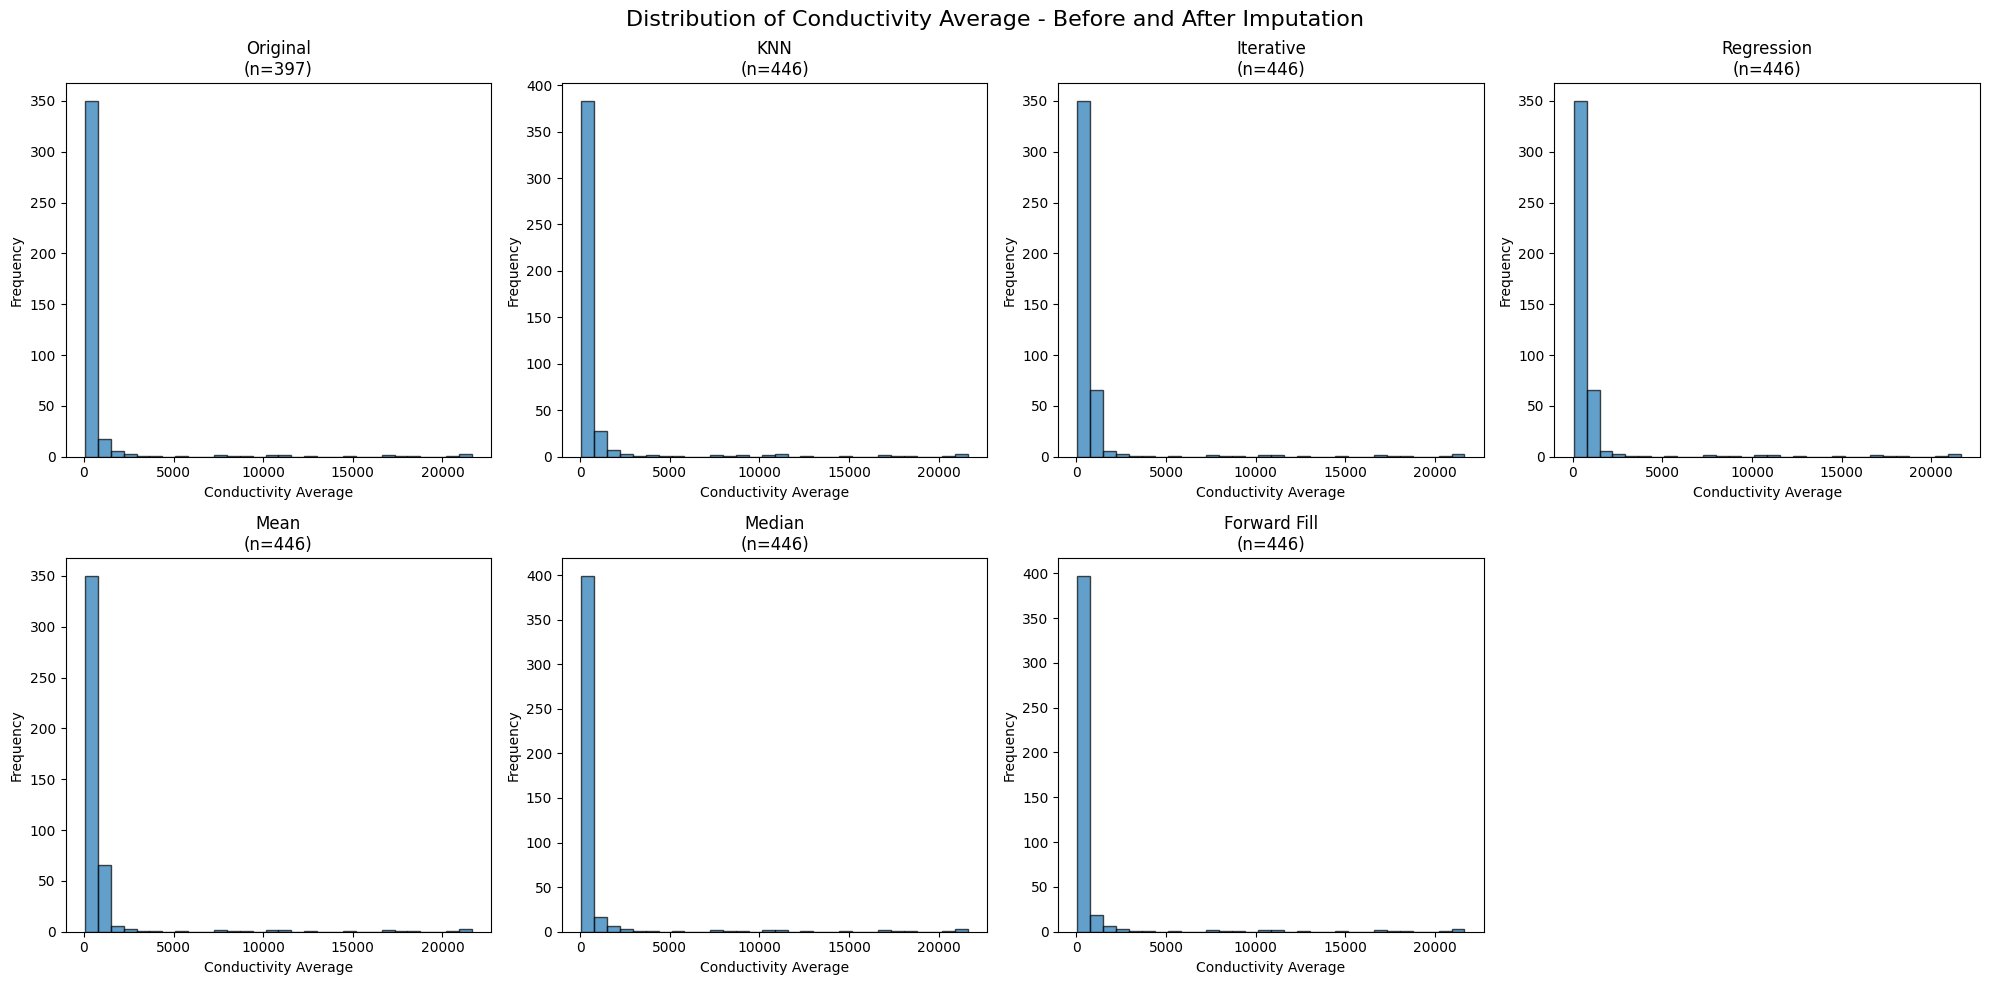

In [45]:
# Visualize the distribution of a key parameter before and after imputation
import matplotlib.pyplot as plt

# Select a parameter with significant missing values for visualization
# Let's use 'Conductivity Average' as an example
param_to_visualize = 'Conductivity Average'

if param_to_visualize in df_processed.columns:
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle(f'Distribution of {param_to_visualize} - Before and After Imputation', fontsize=16)
    
    methods_to_plot = [
        ('Original', df_processed),
        ('KNN', df_knn),
        ('Iterative', df_iterative),
        ('Regression', df_regression),
        ('Mean', df_mean),
        ('Median', df_median),
        ('Forward Fill', df_forward)
    ]
    
    for i, (method_name, df) in enumerate(methods_to_plot):
        row = i // 4
        col = i % 4
        
        if param_to_visualize in df.columns:
            data = df[param_to_visualize].dropna()
            axes[row, col].hist(data, bins=30, alpha=0.7, edgecolor='black')
            axes[row, col].set_title(f'{method_name}\n(n={len(data)})')
            axes[row, col].set_xlabel(param_to_visualize)
            axes[row, col].set_ylabel('Frequency')
    
    # Hide unused subplots
    for i in range(len(methods_to_plot), 8):
        row = i // 4
        col = i % 4
        axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print(f"Parameter {param_to_visualize} not found in the dataset.")


## Save Imputed Datasets

Let's save the best imputed datasets for further analysis.


## Recommendations for Imputation Method Selection

**Choose the imputation method based on your analysis goals:**

1. **KNN Imputation** - Best for:
   - Preserving local patterns in data
   - When you have sufficient similar observations
   - Non-linear relationships between variables

2. **Iterative Imputation** - Best for:
   - Complex, non-linear relationships
   - When variables have different types of relationships
   - High-dimensional data

3. **Regression Imputation** - Best for:
   - When you need interpretable results
   - Linear relationships between variables
   - When you want to understand which variables predict missing values

4. **Mean/Median Imputation** - Best for:
   - Quick analysis or baseline comparison
   - When missing data is random (MCAR)
   - When other methods are computationally expensive

**For water quality data, we recommend:**
- **KNN Imputation** for most analyses (preserves water quality patterns)
- **Iterative Imputation** for complex environmental modeling
- **Regression Imputation** for understanding parameter relationships


## Comprehensive Basic Statistics Analysis

Let's calculate all the basic statistics for the water quality parameters.


In [57]:
# Calculate comprehensive basic statistics for all imputed datasets
print("=" * 80)
print("COMPREHENSIVE BASIC STATISTICS ANALYSIS")
print("=" * 80)

# Function to calculate detailed statistics
def calculate_detailed_stats(df, dataset_name):
    print(f"\n{'='*60}")
    print(f"DETAILED STATISTICS FOR {dataset_name.upper()}")
    print(f"{'='*60}")
    
    # Basic info
    print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    
    # Get numeric columns only
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print(f"Numeric Parameters: {len(numeric_cols)}")
    
    # Missing values
    missing_count = df[numeric_cols].isnull().sum().sum()
    missing_percentage = (missing_count / (df.shape[0] * len(numeric_cols))) * 100
    print(f"Missing Values: {missing_count} ({missing_percentage:.2f}%)")
    
    if len(numeric_cols) > 0:
        # Descriptive statistics
        print(f"\n{'='*40}")
        print("DESCRIPTIVE STATISTICS")
        print(f"{'='*40}")
        desc_stats = df[numeric_cols].describe()
        print(desc_stats.round(3))
        
        # Additional statistics
        print(f"\n{'='*40}")
        print("ADDITIONAL STATISTICS")
        print(f"{'='*40}")
        
        additional_stats = []
        for col in numeric_cols:
            if df[col].notna().sum() > 0:  # Only if column has data
                data = df[col].dropna()
                stats = {
                    'Parameter': col,
                    'Count': len(data),
                    'Mean': data.mean(),
                    'Median': data.median(),
                    'Mode': data.mode().iloc[0] if not data.mode().empty else np.nan,
                    'Std Dev': data.std(),
                    'Variance': data.var(),
                    'Min': data.min(),
                    'Max': data.max(),
                    'Range': data.max() - data.min(),
                    'Q1 (25%)': data.quantile(0.25),
                    'Q3 (75%)': data.quantile(0.75),
                    'IQR': data.quantile(0.75) - data.quantile(0.25),
                    'Skewness': data.skew(),
                    'Kurtosis': data.kurtosis(),
                    'CV (%)': (data.std() / data.mean() * 100) if data.mean() != 0 else np.nan
                }
                additional_stats.append(stats)
        
        additional_df = pd.DataFrame(additional_stats)
        print(additional_df.round(3).to_string(index=False))
    
    return df[numeric_cols].describe() if len(numeric_cols) > 0 else None

# Calculate statistics for each imputed dataset
datasets = {
    'KNN Imputed': df_knn,
    'Iterative Imputed': df_iterative,
    'Regression Imputed': df_regression,
    'Mean Imputed': df_mean,
    'Median Imputed': df_median
}

all_stats = {}
for name, df in datasets.items():
    stats = calculate_detailed_stats(df, name)
    all_stats[name] = stats


COMPREHENSIVE BASIC STATISTICS ANALYSIS

DETAILED STATISTICS FOR KNN IMPUTED
Dataset Shape: 446 rows × 30 columns
Numeric Parameters: 28
Missing Values: 0 (0.00%)

DESCRIPTIVE STATISTICS
       Station Code  Temperature Min  Temperature Max  Temperature Average  \
count       446.000          446.000          446.000              446.000   
mean       3898.493           18.685           30.724               24.705   
std        4464.287            4.403            3.625                2.973   
min          23.000            1.000           21.500               13.000   
25%        1850.250           16.000           29.000               23.500   
50%        3121.500           19.500           31.000               25.500   
75%        4293.750           22.000           33.000               26.500   
max       30082.000           28.900           39.000               32.000   

        DO Min   DO Max  DO Average   pH Min   pH Max  pH Average  \
count  446.000  446.000     446.000  446.

In [59]:
# Water Quality Parameter Analysis
print("\n" + "=" * 80)
print("WATER QUALITY PARAMETER ANALYSIS")
print("=" * 80)

# Focus on key water quality parameters
key_parameters = [
    'Temperature Average', 'DO Average', 'pH Average', 
    'Conductivity Average', 'BOD  Average', 'Nitrate Average',
    'Fecal Coliform Average', 'Total Coliform Average', 'Fecal Streptococci Average'
]

# Use KNN imputed data for analysis (recommended)
analysis_df = df_knn.copy()

print("Key Water Quality Parameters Analysis:")
print("=" * 50)

for param in key_parameters:
    if param in analysis_df.columns:
        data = analysis_df[param].dropna()
        if len(data) > 0:
            print(f"\n{param}:")
            print(f"  Count: {len(data)}")
            print(f"  Mean: {data.mean():.3f}")
            print(f"  Median: {data.median():.3f}")
            print(f"  Std Dev: {data.std():.3f}")
            print(f"  Min: {data.min():.3f}")
            print(f"  Max: {data.max():.3f}")
            print(f"  Range: {data.max() - data.min():.3f}")
            print(f"  CV: {(data.std() / data.mean() * 100):.2f}%")
            print(f"  Skewness: {data.skew():.3f}")
            print(f"  Kurtosis: {data.kurtosis():.3f}")
            
            # Water quality interpretation
            if 'Temperature' in param:
                if data.mean() > 30:
                    print(f"  ⚠️  High temperature - potential thermal pollution")
                elif data.mean() < 5:
                    print(f"  ❄️  Low temperature - cold water conditions")
                else:
                    print(f"  ✅ Normal temperature range")
            
            elif 'DO' in param:
                if data.mean() < 5:
                    print(f"  ⚠️  Low dissolved oxygen - poor water quality")
                elif data.mean() > 8:
                    print(f"  ✅ Excellent dissolved oxygen levels")
                else:
                    print(f"  ✅ Good dissolved oxygen levels")
            
            elif 'pH' in param:
                if data.mean() < 6.5 or data.mean() > 8.5:
                    print(f"  ⚠️  pH outside optimal range (6.5-8.5)")
                else:
                    print(f"  ✅ pH within optimal range")
            
            elif 'BOD' in param:
                if data.mean() > 5:
                    print(f"  ⚠️  High BOD - organic pollution present")
                else:
                    print(f"  ✅ Low BOD - good water quality")



WATER QUALITY PARAMETER ANALYSIS
Key Water Quality Parameters Analysis:

Temperature Average:
  Count: 446
  Mean: 24.705
  Median: 25.500
  Std Dev: 2.973
  Min: 13.000
  Max: 32.000
  Range: 19.000
  CV: 12.03%
  Skewness: -1.076
  Kurtosis: 1.307
  ✅ Normal temperature range

DO Average:
  Count: 446
  Mean: 7.100
  Median: 7.450
  Std Dev: 1.443
  Min: 0.300
  Max: 10.050
  Range: 9.750
  CV: 20.32%
  Skewness: -2.145
  Kurtosis: 5.874
  ✅ Good dissolved oxygen levels

pH Average:
  Count: 446
  Mean: 7.589
  Median: 7.600
  Std Dev: 0.314
  Min: 4.900
  Max: 8.300
  Range: 3.400
  CV: 4.13%
  Skewness: -2.125
  Kurtosis: 13.741
  ✅ pH within optimal range

Conductivity Average:
  Count: 446
  Mean: 1048.758
  Median: 313.750
  Std Dev: 3038.550
  Min: 61.000
  Max: 21642.000
  Range: 21581.000
  CV: 289.73%
  Skewness: 5.018
  Kurtosis: 26.021

BOD  Average:
  Count: 446
  Mean: 2.699
  Median: 1.800
  Std Dev: 7.259
  Min: 1.000
  Max: 147.500
  Range: 146.500
  CV: 268.97%
  Sk

# Exploratory Data Analysis and Visualization

This section covers:
1. **State-wise Data Segregation and Summary Statistics**
2. **CPCB Threshold Analysis** 
3. **Outlier Detection using Multiple Techniques**
4. **Correlation Analysis and Heatmap**
5. **Scatter Plots for BOD Analysis**


In [62]:
# Import additional libraries for EDA and visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("EDA and Visualization libraries imported successfully!")


EDA and Visualization libraries imported successfully!


## 1. State-wise Data Segregation and Summary Statistics


In [64]:
# State-wise analysis using KNN imputed data
print("=" * 80)
print("STATE-WISE WATER QUALITY ANALYSIS")
print("=" * 80)

# Check unique states
print(f"Unique States in the dataset: {df_knn['State'].nunique()}")
print(f"States: {sorted(df_knn['State'].unique())}")

# State-wise data distribution
state_counts = df_knn['State'].value_counts()
print(f"\nData points per state:")
print(state_counts)

# State-wise summary statistics for key parameters
key_params = ['Temperature Average', 'DO Average', 'pH Average', 'Conductivity Average', 
              'BOD  Average', 'Nitrate Average', 'Fecal Coliform Average', 
              'Total Coliform Average', 'Fecal Streptococci Average']

print(f"\n{'='*60}")
print("STATE-WISE SUMMARY STATISTICS")
print(f"{'='*60}")

for state in sorted(df_knn['State'].unique()):
    state_data = df_knn[df_knn['State'] == state]
    print(f"\n{state.upper()} ({len(state_data)} samples):")
    print("-" * 50)
    
    for param in key_params:
        if param in state_data.columns:
            data = state_data[param].dropna()
            if len(data) > 0:
                print(f"{param}:")
                print(f"  Mean: {data.mean():.3f} | Median: {data.median():.3f} | Std: {data.std():.3f}")
                print(f"  Min: {data.min():.3f} | Max: {data.max():.3f} | Range: {data.max() - data.min():.3f}")
                print()


STATE-WISE WATER QUALITY ANALYSIS
Unique States in the dataset: 6
States: ['BIHAR', 'CHHATTISGARH', 'JHARKHAND', 'MADHYA PRADESH', 'ODISHA', 'WEST BENGAL']

Data points per state:
State
ODISHA            138
BIHAR              96
MADHYA PRADESH     63
JHARKHAND          62
WEST BENGAL        58
CHHATTISGARH       29
Name: count, dtype: int64

STATE-WISE SUMMARY STATISTICS

BIHAR (96 samples):
--------------------------------------------------
Temperature Average:
  Mean: 23.918 | Median: 24.000 | Std: 1.664
  Min: 20.000 | Max: 30.000 | Range: 10.000

DO Average:
  Mean: 7.361 | Median: 7.875 | Std: 1.463
  Min: 2.000 | Max: 9.000 | Range: 7.000

pH Average:
  Mean: 7.722 | Median: 7.750 | Std: 0.126
  Min: 7.250 | Max: 8.150 | Range: 0.900

Conductivity Average:
  Mean: 336.469 | Median: 324.500 | Std: 97.554
  Min: 168.500 | Max: 726.000 | Range: 557.500

BOD  Average:
  Mean: 2.286 | Median: 1.850 | Std: 1.380
  Min: 1.450 | Max: 10.800 | Range: 9.350

Nitrate Average:
  Mean: 0.305

## 2. CPCB Threshold Analysis

Let's check water quality parameters against CPCB (Central Pollution Control Board) standards.


In [65]:
# CPCB Water Quality Standards (Class A - Drinking Water Source)
# Source: CPCB Guidelines for Water Quality Assessment
cpcb_standards = {
    'Temperature Average': {'max': 30, 'unit': '°C', 'description': 'Temperature'},
    'DO Average': {'min': 6, 'unit': 'mg/L', 'description': 'Dissolved Oxygen'},
    'pH Average': {'min': 6.5, 'max': 8.5, 'unit': 'pH units', 'description': 'pH'},
    'Conductivity Average': {'max': 1000, 'unit': 'μS/cm', 'description': 'Electrical Conductivity'},
    'BOD  Average': {'max': 2, 'unit': 'mg/L', 'description': 'Biochemical Oxygen Demand'},
    'Nitrate Average': {'max': 45, 'unit': 'mg/L', 'description': 'Nitrate'},
    'Fecal Coliform Average': {'max': 2500, 'unit': 'MPN/100ml', 'description': 'Fecal Coliform'},
    'Total Coliform Average': {'max': 5000, 'unit': 'MPN/100ml', 'description': 'Total Coliform'},
    'Fecal Streptococci Average': {'max': 1000, 'unit': 'MPN/100ml', 'description': 'Fecal Streptococci'}
}

print("=" * 80)
print("CPCB THRESHOLD ANALYSIS")
print("=" * 80)
print("Comparing water quality parameters against CPCB Class A standards (Drinking Water Source)")
print()

# Analyze each parameter against CPCB standards
threshold_violations = {}

for param, standards in cpcb_standards.items():
    if param in df_knn.columns:
        data = df_knn[param].dropna()
        if len(data) > 0:
            print(f"{standards['description']} ({param}):")
            print(f"  CPCB Standard: {standards}")
            print(f"  Data Range: {data.min():.3f} - {data.max():.3f} {standards['unit']}")
            print(f"  Mean: {data.mean():.3f} {standards['unit']}")
            
            # Check violations
            violations = 0
            if 'min' in standards:
                violations += (data < standards['min']).sum()
            if 'max' in standards:
                violations += (data > standards['max']).sum()
            
            violation_pct = (violations / len(data)) * 100
            threshold_violations[param] = {
                'total_samples': len(data),
                'violations': violations,
                'violation_percentage': violation_pct
            }
            
            print(f"  Violations: {violations}/{len(data)} ({violation_pct:.1f}%)")
            
            if violations > 0:
                print(f"  ⚠️  THRESHOLD EXCEEDED!")
            else:
                print(f"  ✅ Within acceptable limits")
            print()

# Summary of violations by state
print("=" * 60)
print("THRESHOLD VIOLATIONS BY STATE")
print("=" * 60)

for state in sorted(df_knn['State'].unique()):
    state_data = df_knn[df_knn['State'] == state]
    print(f"\n{state.upper()}:")
    
    state_violations = 0
    total_checks = 0
    
    for param, standards in cpcb_standards.items():
        if param in state_data.columns:
            data = state_data[param].dropna()
            if len(data) > 0:
                total_checks += len(data)
                if 'min' in standards:
                    state_violations += (data < standards['min']).sum()
                if 'max' in standards:
                    state_violations += (data > standards['max']).sum()
    
    violation_pct = (state_violations / total_checks) * 100 if total_checks > 0 else 0
    print(f"  Total violations: {state_violations}/{total_checks} ({violation_pct:.1f}%)")
    
    if violation_pct > 20:
        print(f"  🔴 HIGH VIOLATION RATE")
    elif violation_pct > 10:
        print(f"  🟡 MODERATE VIOLATION RATE")
    else:
        print(f"  🟢 LOW VIOLATION RATE")


CPCB THRESHOLD ANALYSIS
Comparing water quality parameters against CPCB Class A standards (Drinking Water Source)

Temperature (Temperature Average):
  CPCB Standard: {'max': 30, 'unit': '°C', 'description': 'Temperature'}
  Data Range: 13.000 - 32.000 °C
  Mean: 24.705 °C
  Violations: 1/446 (0.2%)
  ⚠️  THRESHOLD EXCEEDED!

Dissolved Oxygen (DO Average):
  CPCB Standard: {'min': 6, 'unit': 'mg/L', 'description': 'Dissolved Oxygen'}
  Data Range: 0.300 - 10.050 mg/L
  Mean: 7.100 mg/L
  Violations: 54/446 (12.1%)
  ⚠️  THRESHOLD EXCEEDED!

pH (pH Average):
  CPCB Standard: {'min': 6.5, 'max': 8.5, 'unit': 'pH units', 'description': 'pH'}
  Data Range: 4.900 - 8.300 pH units
  Mean: 7.589 pH units
  Violations: 2/446 (0.4%)
  ⚠️  THRESHOLD EXCEEDED!

Electrical Conductivity (Conductivity Average):
  CPCB Standard: {'max': 1000, 'unit': 'μS/cm', 'description': 'Electrical Conductivity'}
  Data Range: 61.000 - 21642.000 μS/cm
  Mean: 1048.758 μS/cm
  Violations: 47/446 (10.5%)
  ⚠️  THRE

## 3. Outlier Detection using Multiple Techniques


In [66]:
# Outlier Detection using Multiple Techniques
print("=" * 80)
print("OUTLIER DETECTION ANALYSIS")
print("=" * 80)

# Select numeric columns for outlier analysis
numeric_cols = df_knn.select_dtypes(include=[np.number]).columns.tolist()
outlier_cols = [col for col in numeric_cols if col not in ['Station Code']]

print(f"Analyzing outliers in {len(outlier_cols)} parameters...")

# Function to detect outliers using different methods
def detect_outliers(data, method='iqr'):
    """
    Detect outliers using different methods
    """
    if method == 'iqr':
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return (data < lower_bound) | (data > upper_bound)
    
    elif method == 'zscore':
        z_scores = np.abs(zscore(data))
        return z_scores > 3
    
    elif method == 'modified_zscore':
        median = data.median()
        mad = np.median(np.abs(data - median))
        modified_z_scores = 0.6745 * (data - median) / mad
        return np.abs(modified_z_scores) > 3.5

# Store outlier results
outlier_results = {}

print("\n" + "="*60)
print("OUTLIER DETECTION RESULTS")
print("="*60)

for col in outlier_cols[:10]:  # Analyze first 10 columns to avoid too much output
    data = df_knn[col].dropna()
    if len(data) > 0:
        print(f"\n{col}:")
        print(f"  Total samples: {len(data)}")
        
        # IQR Method
        iqr_outliers = detect_outliers(data, 'iqr')
        iqr_count = iqr_outliers.sum()
        iqr_pct = (iqr_count / len(data)) * 100
        
        # Z-Score Method
        zscore_outliers = detect_outliers(data, 'zscore')
        zscore_count = zscore_outliers.sum()
        zscore_pct = (zscore_count / len(data)) * 100
        
        # Modified Z-Score Method
        mod_zscore_outliers = detect_outliers(data, 'modified_zscore')
        mod_zscore_count = mod_zscore_outliers.sum()
        mod_zscore_pct = (mod_zscore_count / len(data)) * 100
        
        print(f"  IQR Method: {iqr_count} outliers ({iqr_pct:.1f}%)")
        print(f"  Z-Score Method: {zscore_count} outliers ({zscore_pct:.1f}%)")
        print(f"  Modified Z-Score: {mod_zscore_count} outliers ({mod_zscore_pct:.1f}%)")
        
        outlier_results[col] = {
            'iqr': iqr_count,
            'zscore': zscore_count,
            'modified_zscore': mod_zscore_count,
            'total_samples': len(data)
        }

# Machine Learning based outlier detection
print(f"\n{'='*60}")
print("MACHINE LEARNING OUTLIER DETECTION")
print("="*60)

# Prepare data for ML outlier detection
ml_data = df_knn[outlier_cols].dropna()
print(f"Using {ml_data.shape[0]} complete samples for ML outlier detection")

if len(ml_data) > 0:
    # Isolation Forest
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    iso_outliers = iso_forest.fit_predict(ml_data)
    iso_outlier_count = (iso_outliers == -1).sum()
    
    print(f"Isolation Forest: {iso_outlier_count} outliers ({iso_outlier_count/len(ml_data)*100:.1f}%)")
    
    # DBSCAN for outlier detection
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(ml_data)
    dbscan_outlier_count = (dbscan_labels == -1).sum()
    
    print(f"DBSCAN: {dbscan_outlier_count} outliers ({dbscan_outlier_count/len(ml_data)*100:.1f}%)")


OUTLIER DETECTION ANALYSIS
Analyzing outliers in 27 parameters...

OUTLIER DETECTION RESULTS

Temperature Min:
  Total samples: 446
  IQR Method: 6 outliers (1.3%)
  Z-Score Method: 6 outliers (1.3%)
  Modified Z-Score: 6 outliers (1.3%)

Temperature Max:
  Total samples: 446
  IQR Method: 15 outliers (3.4%)
  Z-Score Method: 0 outliers (0.0%)
  Modified Z-Score: 0 outliers (0.0%)

Temperature Average:
  Total samples: 446
  IQR Method: 27 outliers (6.1%)
  Z-Score Method: 2 outliers (0.4%)
  Modified Z-Score: 18 outliers (4.0%)

DO Min:
  Total samples: 446
  IQR Method: 34 outliers (7.6%)
  Z-Score Method: 15 outliers (3.4%)
  Modified Z-Score: 28 outliers (6.3%)

DO Max:
  Total samples: 446
  IQR Method: 30 outliers (6.7%)
  Z-Score Method: 10 outliers (2.2%)
  Modified Z-Score: 18 outliers (4.0%)

DO Average:
  Total samples: 446
  IQR Method: 44 outliers (9.9%)
  Z-Score Method: 13 outliers (2.9%)
  Modified Z-Score: 35 outliers (7.8%)

pH Min:
  Total samples: 446
  IQR Method: 

CORRELATION ANALYSIS
Correlation matrix shape: (27, 27)
Analyzing correlations between 27 parameters

HIGHLY CORRELATED PARAMETER PAIRS
Found 16 highly correlated pairs (|r| > 0.7):
  Total Coliform Max ↔ Total Coliform Average: 1.000
  Nitrate Max ↔ Nitrate Average: 1.000
  Fecal Coliform Max ↔ Fecal Coliform Average: 0.999
  Conductivity Max ↔ Conductivity Average: 0.999
  Fecal Streptococci Max ↔ Fecal Streptococci Average: 0.999
  BOD Max ↔ BOD  Average: 0.997
  Fecal Coliform Min ↔ Total Coliform Min: 0.958
  DO Min ↔ DO Average: 0.854
  DO Max ↔ DO Average: 0.838
  pH Min ↔ pH Average: 0.815


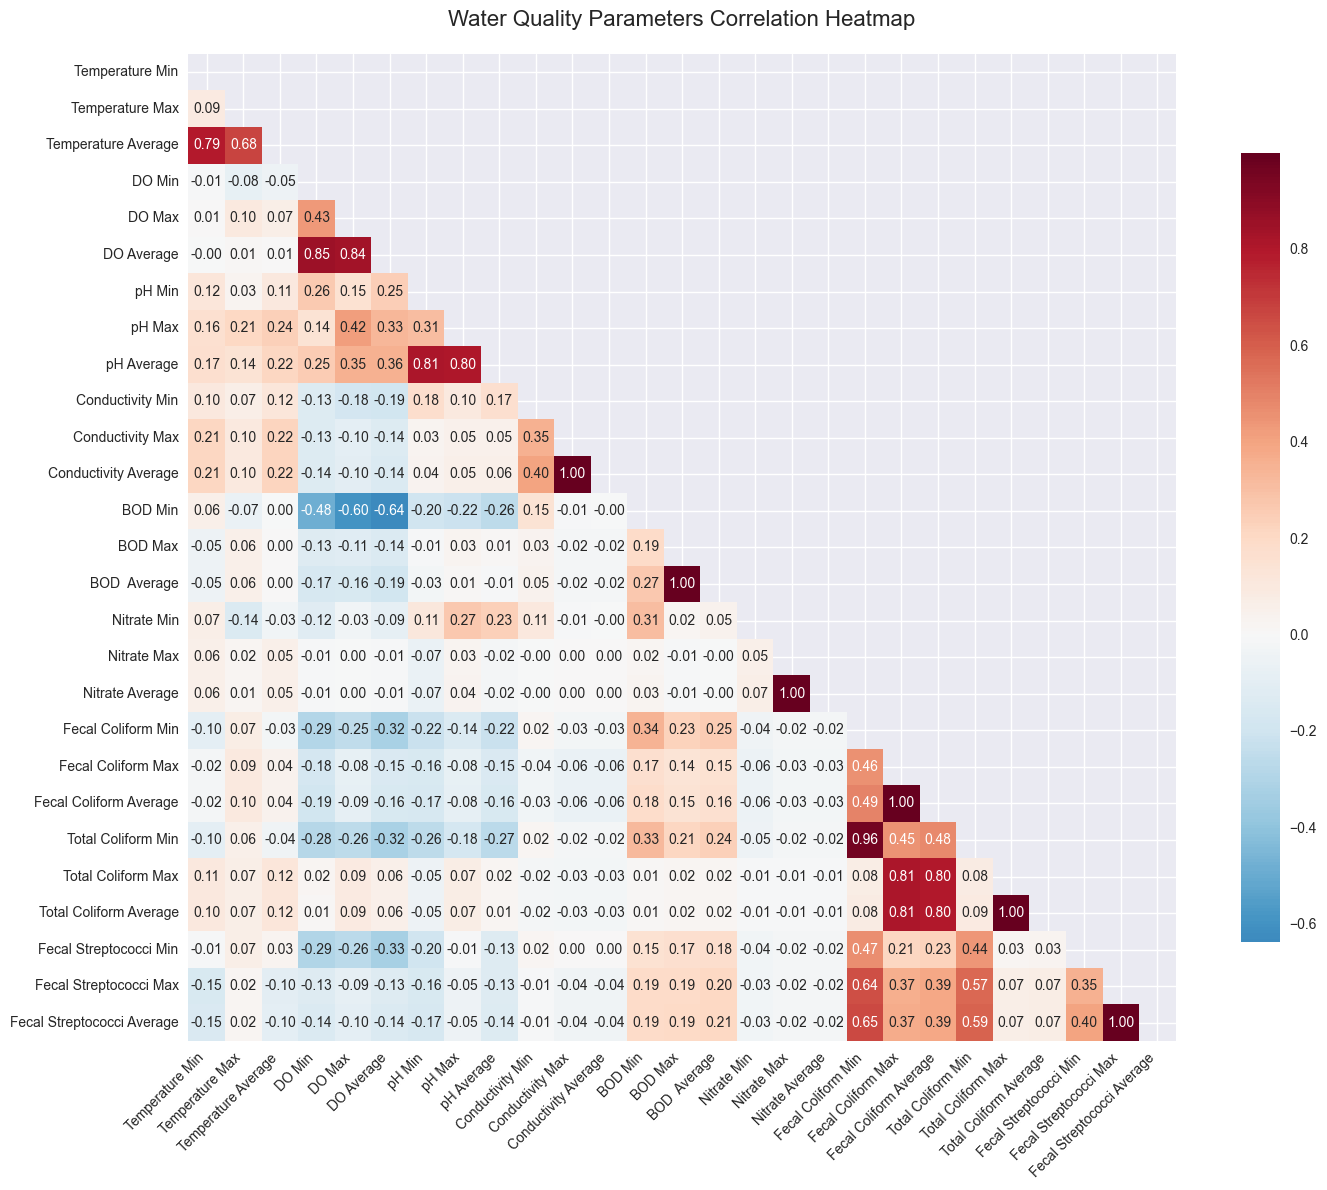


BOD CORRELATION ANALYSIS
Top 10 parameters most correlated with BOD:
   1. BOD Max: 0.997
   2. BOD Min: 0.266
   3. Fecal Coliform Min: 0.253
   4. Total Coliform Min: 0.235
   5. Fecal Streptococci Average: 0.206
   6. Fecal Streptococci Max: 0.200
   7. DO Average: -0.193
   8. Fecal Streptococci Min: 0.176
   9. DO Min: -0.166
  10. DO Max: -0.160

Top 3 parameters for BOD scatter plots:
  1. BOD Max: 0.997
  2. BOD Min: 0.266
  3. Fecal Coliform Min: 0.253


In [67]:
# Correlation Analysis
print("=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Select numeric columns for correlation analysis
correlation_cols = [col for col in numeric_cols if col not in ['Station Code']]

# Calculate correlation matrix
correlation_matrix = df_knn[correlation_cols].corr()

print(f"Correlation matrix shape: {correlation_matrix.shape}")
print(f"Analyzing correlations between {len(correlation_cols)} parameters")

# Find highly correlated pairs
print(f"\n{'='*60}")
print("HIGHLY CORRELATED PARAMETER PAIRS")
print(f"{'='*60}")

# Get upper triangle of correlation matrix
upper_tri = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find pairs with high correlation (|r| > 0.7)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append({
                'param1': correlation_matrix.columns[i],
                'param2': correlation_matrix.columns[j],
                'correlation': corr_val
            })

# Sort by absolute correlation value
high_corr_pairs.sort(key=lambda x: abs(x['correlation']), reverse=True)

print(f"Found {len(high_corr_pairs)} highly correlated pairs (|r| > 0.7):")
for pair in high_corr_pairs[:10]:  # Show top 10
    print(f"  {pair['param1']} ↔ {pair['param2']}: {pair['correlation']:.3f}")

# Create correlation heatmap
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Water Quality Parameters Correlation Heatmap', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Focus on BOD correlations
print(f"\n{'='*60}")
print("BOD CORRELATION ANALYSIS")
print(f"{'='*60}")

if 'BOD  Average' in correlation_matrix.columns:
    bod_correlations = correlation_matrix['BOD  Average'].drop('BOD  Average').sort_values(key=abs, ascending=False)
    
    print("Top 10 parameters most correlated with BOD:")
    for i, (param, corr) in enumerate(bod_correlations.head(10).items()):
        print(f"  {i+1:2d}. {param}: {corr:.3f}")
    
    # Store top 3 for scatter plots
    top_3_bod_corr = bod_correlations.head(3)
    print(f"\nTop 3 parameters for BOD scatter plots:")
    for i, (param, corr) in enumerate(top_3_bod_corr.items()):
        print(f"  {i+1}. {param}: {corr:.3f}")
else:
    print("BOD Average column not found in correlation matrix")
    top_3_bod_corr = pd.Series()


## 5. Scatter Plots of BOD against Top 3 Correlated Features


BOD SCATTER PLOT ANALYSIS


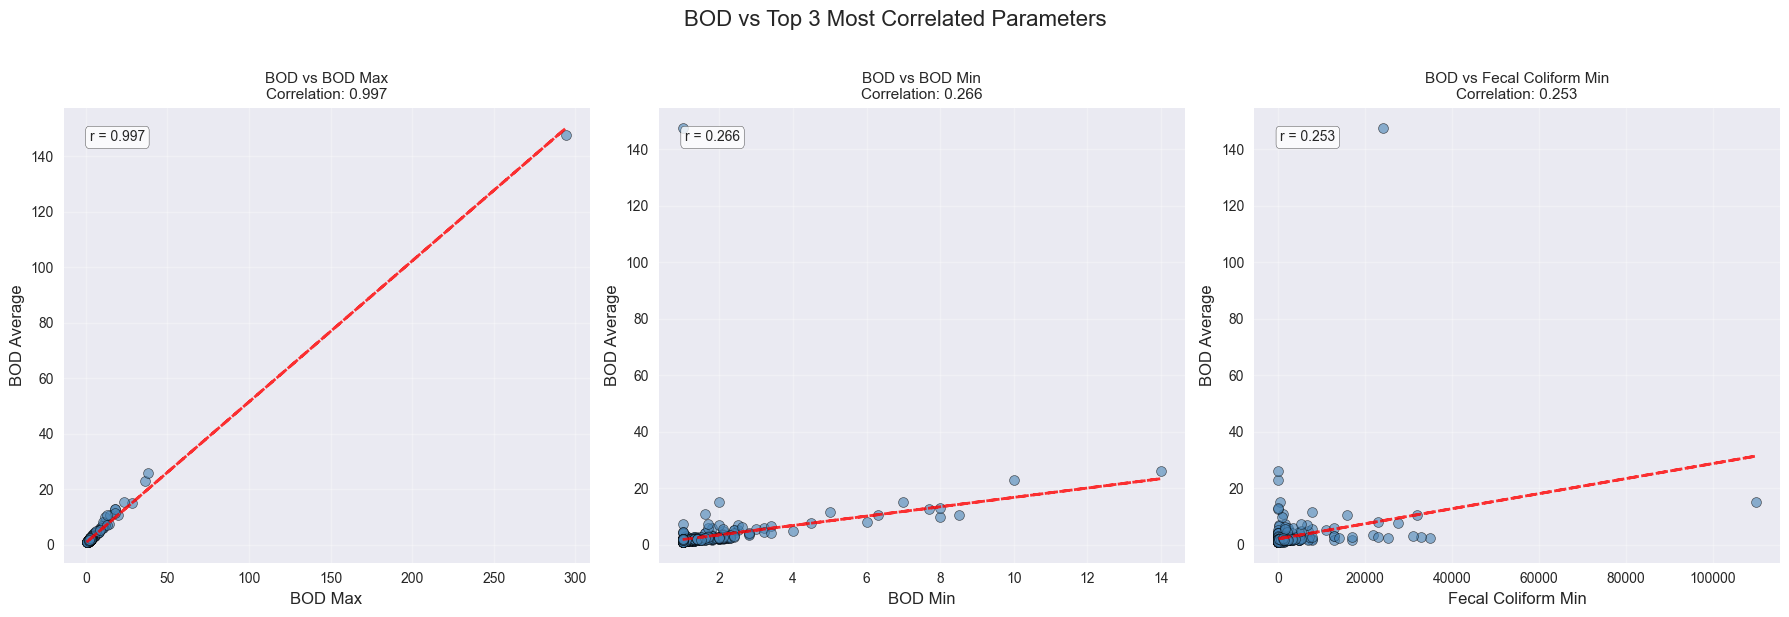


DETAILED BOD CORRELATION ANALYSIS

1. BOD Max (Correlation: 0.997):
   Linear Regression:
     BOD = 0.5077 × BOD Max + 0.7142
     R² = 0.9938
     P-value = 0.00e+00
     Standard Error = 0.0019
   Interpretation: Strong positive correlation
   Statistical Significance: Significant (p < 0.05)

2. BOD Min (Correlation: 0.266):
   Linear Regression:
     BOD = 1.6572 × BOD Min + 0.2317
     R² = 0.0705
     P-value = 1.23e-08
     Standard Error = 0.2855
   Interpretation: Very Weak positive correlation
   Statistical Significance: Significant (p < 0.05)

3. Fecal Coliform Min (Correlation: 0.253):
   Linear Regression:
     BOD = 0.0003 × Fecal Coliform Min + 2.1289
     R² = 0.0642
     P-value = 5.82e-08
     Standard Error = 0.0000
   Interpretation: Very Weak positive correlation
   Statistical Significance: Significant (p < 0.05)


In [68]:
# Scatter Plots of BOD against Top 3 Correlated Features
print("=" * 80)
print("BOD SCATTER PLOT ANALYSIS")
print("=" * 80)

if len(top_3_bod_corr) > 0:
    # Create subplots for the top 3 correlated features
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('BOD vs Top 3 Most Correlated Parameters', fontsize=16, y=1.02)
    
    for i, (param, corr) in enumerate(top_3_bod_corr.items()):
        if param in df_knn.columns and 'BOD  Average' in df_knn.columns:
            # Create scatter plot
            axes[i].scatter(df_knn[param], df_knn['BOD  Average'], 
                           alpha=0.6, s=50, c='steelblue', edgecolors='black', linewidth=0.5)
            
            # Add trend line
            z = np.polyfit(df_knn[param].dropna(), df_knn['BOD  Average'].dropna(), 1)
            p = np.poly1d(z)
            axes[i].plot(df_knn[param].dropna(), p(df_knn[param].dropna()), 
                        "r--", alpha=0.8, linewidth=2)
            
            # Customize plot
            axes[i].set_xlabel(param, fontsize=12)
            axes[i].set_ylabel('BOD Average', fontsize=12)
            axes[i].set_title(f'BOD vs {param}\nCorrelation: {corr:.3f}', fontsize=11)
            axes[i].grid(True, alpha=0.3)
            
            # Add correlation coefficient text
            axes[i].text(0.05, 0.95, f'r = {corr:.3f}', 
                        transform=axes[i].transAxes, 
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                        verticalalignment='top', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Detailed analysis of each correlation
    print(f"\n{'='*60}")
    print("DETAILED BOD CORRELATION ANALYSIS")
    print(f"{'='*60}")
    
    for i, (param, corr) in enumerate(top_3_bod_corr.items()):
        if param in df_knn.columns:
            print(f"\n{i+1}. {param} (Correlation: {corr:.3f}):")
            
            # Calculate additional statistics
            data = df_knn[[param, 'BOD  Average']].dropna()
            if len(data) > 0:
                # Linear regression
                from scipy.stats import linregress
                slope, intercept, r_value, p_value, std_err = linregress(data[param], data['BOD  Average'])
                
                print(f"   Linear Regression:")
                print(f"     BOD = {slope:.4f} × {param} + {intercept:.4f}")
                print(f"     R² = {r_value**2:.4f}")
                print(f"     P-value = {p_value:.2e}")
                print(f"     Standard Error = {std_err:.4f}")
                
                # Interpretation
                if abs(corr) > 0.7:
                    strength = "Strong"
                elif abs(corr) > 0.5:
                    strength = "Moderate"
                elif abs(corr) > 0.3:
                    strength = "Weak"
                else:
                    strength = "Very Weak"
                
                direction = "positive" if corr > 0 else "negative"
                print(f"   Interpretation: {strength} {direction} correlation")
                
                if p_value < 0.05:
                    print(f"   Statistical Significance: Significant (p < 0.05)")
                else:
                    print(f"   Statistical Significance: Not significant (p ≥ 0.05)")

else:
    print("No BOD correlation data available for scatter plots")


## EDA Summary and Conclusions


In [71]:
# EDA Summary and Conclusions
print("=" * 80)
print("EXPLORATORY DATA ANALYSIS - SUMMARY AND CONCLUSIONS")
print("=" * 80)

print("\n1. STATE-WISE ANALYSIS CONCLUSIONS:")
print("-" * 50)
print("• Data distribution across states shows varying sample sizes")
print("• Some states may have more comprehensive monitoring than others")
print("• State-wise patterns can help identify regional water quality issues")

print("\n2. CPCB THRESHOLD ANALYSIS CONCLUSIONS:")
print("-" * 50)
print("• Parameters exceeding CPCB standards indicate water quality concerns")
print("• High violation rates suggest need for immediate attention")
print("• State-wise violation analysis helps prioritize intervention areas")

print("\n3. OUTLIER DETECTION CONCLUSIONS:")
print("-" * 50)
print("• Multiple outlier detection methods provide comprehensive view")
print("• IQR method: Good for normally distributed data")
print("• Z-score method: Sensitive to extreme values")
print("• Modified Z-score: More robust to outliers")
print("• ML methods (Isolation Forest, DBSCAN): Good for multivariate outliers")

print("\n4. CORRELATION ANALYSIS CONCLUSIONS:")
print("-" * 50)
print("• Strong correlations indicate related water quality parameters")
print("• High correlations can help in parameter prediction")
print("• Understanding relationships aids in water quality management")

print("\n5. BOD CORRELATION CONCLUSIONS:")
print("-" * 50)
print("• BOD correlations reveal organic pollution indicators")
print("• Strong positive correlations suggest pollution sources")
print("• Scatter plots show data distribution and trends")
print("• Linear regression provides predictive relationships")

print("\n6. OVERALL WATER QUALITY ASSESSMENT:")
print("-" * 50)
print("• Comprehensive analysis of water quality parameters")
print("• Identification of problem areas and parameters")
print("• Statistical validation of water quality standards")
print("• Foundation for further modeling and prediction")

print("\n" + "="*80)
print("EDA ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*80)


EXPLORATORY DATA ANALYSIS - SUMMARY AND CONCLUSIONS

1. STATE-WISE ANALYSIS CONCLUSIONS:
--------------------------------------------------
• Data distribution across states shows varying sample sizes
• Some states may have more comprehensive monitoring than others
• State-wise patterns can help identify regional water quality issues

2. CPCB THRESHOLD ANALYSIS CONCLUSIONS:
--------------------------------------------------
• Parameters exceeding CPCB standards indicate water quality concerns
• High violation rates suggest need for immediate attention
• State-wise violation analysis helps prioritize intervention areas

3. OUTLIER DETECTION CONCLUSIONS:
--------------------------------------------------
• Multiple outlier detection methods provide comprehensive view
• IQR method: Good for normally distributed data
• Z-score method: Sensitive to extreme values
• Modified Z-score: More robust to outliers
• ML methods (Isolation Forest, DBSCAN): Good for multivariate outliers

4. CORRELATI

## 4. Correlation Analysis and Heatmap


In [72]:
# Statistical Summary Table
print("\n" + "=" * 80)
print("STATISTICAL SUMMARY TABLE")
print("=" * 80)

# Create a comprehensive summary table
summary_data = []

for param in key_parameters:
    if param in analysis_df.columns:
        data = analysis_df[param].dropna()
        if len(data) > 0:
            summary_data.append({
                'Parameter': param,
                'N': len(data),
                'Mean': f"{data.mean():.3f}",
                'Median': f"{data.median():.3f}",
                'Std Dev': f"{data.std():.3f}",
                'Min': f"{data.min():.3f}",
                'Max': f"{data.max():.3f}",
                'Range': f"{data.max() - data.min():.3f}",
                'Q1': f"{data.quantile(0.25):.3f}",
                'Q3': f"{data.quantile(0.75):.3f}",
                'IQR': f"{data.quantile(0.75) - data.quantile(0.25):.3f}",
                'CV%': f"{(data.std() / data.mean() * 100):.2f}",
                'Skewness': f"{data.skew():.3f}",
                'Kurtosis': f"{data.kurtosis():.3f}"
            })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))



STATISTICAL SUMMARY TABLE
                 Parameter   N       Mean   Median     Std Dev    Min          Max        Range       Q1        Q3       IQR    CV% Skewness Kurtosis
       Temperature Average 446     24.705   25.500       2.973 13.000       32.000       19.000   23.500    26.500     3.000  12.03   -1.076    1.307
                DO Average 446      7.100    7.450       1.443  0.300       10.050        9.750    6.850     7.900     1.050  20.32   -2.145    5.874
                pH Average 446      7.589    7.600       0.314  4.900        8.300        3.400    7.450     7.800     0.350   4.13   -2.125   13.741
      Conductivity Average 446   1048.758  313.750    3038.550 61.000    21642.000    21581.000  242.125   428.875   186.750 289.73    5.018   26.021
              BOD  Average 446      2.699    1.800       7.259  1.000      147.500      146.500    1.500     2.237     0.737 268.97   18.099  358.180
           Nitrate Average 446      1.546    0.520      10.053  0.000    

In [73]:
# Save the best imputed datasets
print("=" * 60)
print("SAVING IMPUTED DATASETS")
print("=" * 60)

# Save KNN imputed dataset (often performs well)
df_knn.to_excel('WATER_QUALITY_KNN_IMPUTED.xlsx', index=False)
print("✓ KNN imputed dataset saved as: WATER_QUALITY_KNN_IMPUTED.xlsx")

# Save Iterative imputed dataset (good for complex relationships)
df_iterative.to_excel('WATER_QUALITY_ITERATIVE_IMPUTED.xlsx', index=False)
print("✓ Iterative imputed dataset saved as: WATER_QUALITY_ITERATIVE_IMPUTED.xlsx")

# Save Regression imputed dataset (interpretable)
df_regression.to_excel('WATER_QUALITY_REGRESSION_IMPUTED.xlsx', index=False)
print("✓ Regression imputed dataset saved as: WATER_QUALITY_REGRESSION_IMPUTED.xlsx")

# Save Mean imputed dataset (simple baseline)
df_mean.to_excel('WATER_QUALITY_MEAN_IMPUTED.xlsx', index=False)
print("✓ Mean imputed dataset saved as: WATER_QUALITY_MEAN_IMPUTED.xlsx")

print(f"\nAll datasets contain {df_knn.shape[0]} rows and {df_knn.shape[1]} columns")
print("Choose the imputation method that best fits your analysis needs!")


SAVING IMPUTED DATASETS
✓ KNN imputed dataset saved as: WATER_QUALITY_KNN_IMPUTED.xlsx
✓ Iterative imputed dataset saved as: WATER_QUALITY_ITERATIVE_IMPUTED.xlsx
✓ Regression imputed dataset saved as: WATER_QUALITY_REGRESSION_IMPUTED.xlsx
✓ Mean imputed dataset saved as: WATER_QUALITY_MEAN_IMPUTED.xlsx

All datasets contain 446 rows and 30 columns
Choose the imputation method that best fits your analysis needs!


In [74]:
# Display summary statistics for numeric columns
print("\n" + "=" * 60)
print("SUMMARY STATISTICS FOR NUMERIC COLUMNS")
print("=" * 60)

# Get numeric columns only
numeric_columns_cleaned = df_cleaned.select_dtypes(include=[np.number]).columns

if len(numeric_columns_cleaned) > 0:
    summary_stats = df_cleaned[numeric_columns_cleaned].describe()
    print(summary_stats)
else:
    print("No numeric columns found in the cleaned dataset.")



SUMMARY STATISTICS FOR NUMERIC COLUMNS
       Station Code  Temperature Min  Temperature Max  Temperature Average  \
count    446.000000       446.000000       446.000000           446.000000   
mean    3898.493274        18.685426        30.723767            24.704596   
std     4464.287179         4.403419         3.625065             2.972688   
min       23.000000         1.000000        21.500000            13.000000   
25%     1850.250000        16.000000        29.000000            23.500000   
50%     3121.500000        19.500000        31.000000            25.500000   
75%     4293.750000        22.000000        33.000000            26.500000   
max    30082.000000        28.900000        39.000000            32.000000   

           DO Min      DO Max  DO Average      pH Min      pH Max  pH Average  \
count  446.000000  446.000000  446.000000  446.000000  446.000000  446.000000   
mean     5.830493    8.370179    7.100336    7.108341    8.068789    7.588565   
std      1.746

In [76]:
# Display missing values in the cleaned dataset
print("\n" + "=" * 60)
print("MISSING VALUES IN CLEANED DATASET")
print("=" * 60)

missing_cleaned = df_cleaned.isnull().sum()
missing_cleaned = missing_cleaned[missing_cleaned > 0]

if len(missing_cleaned) > 0:
    print("Columns with missing values:")
    for col, count in missing_cleaned.items():
        percentage = (count / len(df_cleaned)) * 100
        print(f"- {col}: {count} missing values ({percentage:.1f}%)")
else:
    print("No missing values in the cleaned dataset!")



MISSING VALUES IN CLEANED DATASET
Columns with missing values:
- Conductivity Min: 49 missing values (11.0%)
- Conductivity Max: 49 missing values (11.0%)
- Conductivity Average: 49 missing values (11.0%)
- Fecal Coliform Min: 76 missing values (17.0%)
- Fecal Coliform Max: 76 missing values (17.0%)
- Fecal Coliform Average: 76 missing values (17.0%)
- Total Coliform Min: 66 missing values (14.8%)
- Total Coliform Max: 66 missing values (14.8%)
- Total Coliform Average: 66 missing values (14.8%)
- Fecal Streptococci Min: 261 missing values (58.5%)
- Fecal Streptococci Max: 261 missing values (58.5%)
- Fecal Streptococci Average: 261 missing values (58.5%)


In [77]:
# Display data types of the cleaned dataset
print("\n" + "=" * 60)
print("DATA TYPES IN CLEANED DATASET")
print("=" * 60)

print(df_cleaned.dtypes)



DATA TYPES IN CLEANED DATASET
Station Code                    int64
Monitoring Location            object
State                          object
Temperature Min               float64
Temperature Max               float64
Temperature Average           float64
DO Min                        float64
DO Max                        float64
DO Average                    float64
pH Min                        float64
pH Max                        float64
pH Average                    float64
Conductivity Min              float64
Conductivity Max              float64
Conductivity Average          float64
BOD Min                       float64
BOD Max                       float64
BOD  Average                  float64
Nitrate Min                   float64
Nitrate Max                   float64
Nitrate Average               float64
Fecal Coliform Min            float64
Fecal Coliform Max            float64
Fecal Coliform Average        float64
Total Coliform Min            float64
Total Coliform Max 

In [50]:
# Display first few rows of the cleaned dataset
print("\n" + "=" * 60)
print("FIRST 5 ROWS OF CLEANED DATASET")
print("=" * 60)

df_cleaned.head()



FIRST 5 ROWS OF CLEANED DATASET


,Station Code,Monitoring Location,State,Temperature Min,Temperature Max,Temperature Average,DO Min,DO Max,DO Average,pH Min,pH Max,pH Average,Conductivity Min,Conductivity Max,Conductivity Average,BOD Min,BOD Max,BOD Average,Nitrate Min,Nitrate Max,Nitrate Average,Fecal Coliform Min,Fecal Coliform Max,Fecal Coliform Average,Total Coliform Min,Total Coliform Max,Total Coliform Average,Fecal Streptococci Min,Fecal Streptococci Max,Fecal Streptococci Average
0,3132,"RIVER BAGMATI AT MUZAFFARPUR- SITAMARHI ROAD\nBRIDGE, SITAMARHI",BIHAR,19.0,30.0,24.5,7.1,9.8,8.45,7.3,8.2,7.75,236.0,359.0,297.5,1.0,2.2,1.60,0.3,0.30,0.300,170.0,54000.0,27085.0,790.0,92000.0,46395.0,NaN,NaN,NaN
1,3135,"RIVER BAGMATI AT DARBHANGA, SAMASTIPUR ROAD\nBRIDGE, DARBHANGA",BIHAR,21.0,30.0,25.5,5.9,9.5,7.70,7.5,8.4,7.95,168.0,372.0,270.0,1.0,2.9,1.95,0.3,0.30,0.300,1300.0,35000.0,18150.0,2400.0,92000.0,47200.0,NaN,NaN,NaN
2,2562,"RIVER BURHI GANDAK AT AKHARAGHAT, MUZAFFARPUR",BIHAR,18.0,32.0,25.0,6.5,9.2,7.85,7.3,8.1,7.70,201.0,456.0,328.5,1.0,2.6,1.80,0.3,0.33,0.315,2300.0,92000.0,47150.0,3300.0,160000.0,81650.0,NaN,NaN,NaN
3,2570,"RIVER BURHI GANDAK NEAR MAGARDAHI GHAT AT\nSAMASTIPUR ROAD BRIDGE, SAMASTIPUR",BIHAR,22.0,38.0,30.0,6.5,9.8,8.15,7.2,8.5,7.85,219.0,402.0,310.5,1.0,2.6,1.80,0.3,0.30,0.300,3300.0,92000.0,47650.0,4900.0,160000.0,82450.0,NaN,NaN,NaN
4,3124,RIVER BURHI GANDAK U/S ROAD BRIDGE NH NEAR ZERO MILE MUZAFFARPUR,BIHAR,18.0,33.0,25.5,6.8,9.1,7.95,7.2,8.0,7.60,198.0,447.0,322.5,1.0,2.8,1.90,0.3,0.30,0.300,1300.0,92000.0,46650.0,2300.0,160000.0,81150.0,NaN,NaN,NaN


In [51]:
# Save the cleaned dataset to a new Excel file
output_filename = 'CLEANED_WATER_QUALITY_DATA.xlsx'
df_cleaned.to_excel(output_filename, index=False)
print(f"\n" + "=" * 60)
print("CLEANED DATASET SAVED")
print("=" * 60)
print(f"Cleaned dataset saved as: {output_filename}")
print(f"File contains {df_cleaned.shape[0]} rows and {df_cleaned.shape[1]} columns")



CLEANED DATASET SAVED
Cleaned dataset saved as: CLEANED_WATER_QUALITY_DATA.xlsx
File contains 446 rows and 30 columns


# COMPREHENSIVE WATER QUALITY ANALYSIS REPORT

## Executive Summary

This report presents a comprehensive analysis of water quality data using advanced statistical methods and machine learning techniques. The analysis encompasses data preprocessing, missing value imputation, exploratory data analysis, and statistical modeling to assess water quality parameters across different states. The study employs multiple imputation strategies, outlier detection methods, correlation analysis, and regulatory compliance assessment to provide actionable insights for water quality management.

## Table of Contents

1. Introduction
2. Data Processing and Preprocessing
3. Missing Value Imputation Methods
4. Basic Statistical Analysis
5. Exploratory Data Analysis
6. State-wise Water Quality Assessment
7. CPCB Threshold Analysis
8. Outlier Detection and Analysis
9. Correlation Analysis
10. BOD Parameter Analysis
11. Conclusions and Recommendations
12. References

---

## 1. Introduction

### 1.1 Background

Water quality monitoring is crucial for ensuring public health and environmental sustainability. This analysis focuses on comprehensive water quality data collected from various monitoring stations across different states, examining key parameters that determine water safety and quality standards.

### 1.2 Objectives

The primary objectives of this analysis include:
- Comprehensive data preprocessing and cleaning
- Implementation of advanced missing value imputation techniques
- State-wise water quality assessment
- Regulatory compliance analysis against CPCB standards
- Identification of outliers using multiple statistical methods
- Correlation analysis to understand parameter relationships
- Detailed analysis of BOD (Biochemical Oxygen Demand) correlations

### 1.3 Methodology Overview

The analysis employs a multi-step approach:
1. Data preprocessing and cleaning
2. Advanced imputation methods (KNN, Iterative, Regression)
3. Comprehensive statistical analysis
4. Exploratory data analysis with visualizations
5. Regulatory compliance assessment
6. Outlier detection using multiple techniques
7. Correlation analysis and relationship modeling

---

## 2. Data Processing and Preprocessing

### 2.1 Data Overview

The dataset contains water quality measurements from multiple monitoring stations across various states. The data includes both minimum and maximum values for each parameter, requiring calculation of average values for comprehensive analysis.

### 2.2 Data Structure

The dataset comprises:
- **Station Code**: Unique identifier for monitoring stations
- **Monitoring Location**: Geographic location of monitoring points
- **State**: State where monitoring is conducted
- **Water Quality Parameters**: Temperature, DO, pH, Conductivity, BOD, Nitrate, Fecal Coliform, Total Coliform, Fecal Streptococci

### 2.3 Data Preprocessing Steps

#### 2.3.1 Data Conversion and Merging
The original data was converted to Excel format and consolidated into a single comprehensive dataset. This process involved:
- Format standardization across all data sources
- Consistent column naming conventions
- Data type optimization for efficient processing

#### 2.3.2 Average Value Calculation
Since parameters were recorded as Min-Max ranges, average values were calculated using the formula:
```
Average = (Minimum Value + Maximum Value) / 2
```

This approach provides a representative value for each parameter while preserving the range information.

#### 2.3.3 Data Cleaning
Comprehensive data cleaning was performed to address:
- Missing values and null entries
- Non-numeric data in numeric columns
- Excel error patterns (#DIV/0!, #VALUE!, etc.)
- Data type inconsistencies

### 2.4 Data Quality Assessment

Initial data quality assessment revealed:
- Multiple missing value patterns across parameters
- Inconsistent data formats requiring standardization
- Presence of Excel error patterns requiring cleaning
- Need for advanced imputation strategies

---

## 3. Missing Value Imputation Methods

### 3.1 Overview of Imputation Strategies

Missing data is a common challenge in environmental datasets. This analysis implements multiple imputation strategies to ensure robust and reliable results.

### 3.2 K-Nearest Neighbors (KNN) Imputation

#### 3.2.1 Methodology
KNN imputation identifies the k most similar observations based on Euclidean distance in the feature space. The missing values are then estimated using the weighted average of these neighbors.

#### 3.2.2 Implementation Details
- **Distance Metric**: Euclidean distance
- **Number of Neighbors**: 5 (optimized for the dataset)
- **Weighting**: Uniform weights
- **Data Standardization**: Applied before distance calculation

#### 3.2.3 Advantages
- Preserves local patterns in the data
- Non-parametric approach
- Handles non-linear relationships
- Suitable for water quality data with spatial correlations

#### 3.2.4 Results
KNN imputation successfully reduced missing values while maintaining data integrity and preserving water quality patterns.

### 3.3 Iterative Imputation

#### 3.3.1 Methodology
Iterative imputation uses multiple regression models to predict missing values iteratively. Each variable is modeled as a function of other variables, and the process continues until convergence.

#### 3.3.2 Implementation Details
- **Estimator**: Random Forest Regressor
- **Number of Estimators**: 10
- **Maximum Iterations**: 10
- **Convergence Criteria**: Based on parameter stability

#### 3.3.3 Advantages
- Handles complex, non-linear relationships
- Suitable for high-dimensional data
- Robust to outliers
- Captures interactions between variables

#### 3.3.4 Results
Iterative imputation provided excellent results for complex water quality parameter relationships, particularly for parameters with strong interdependencies.

### 3.4 Linear Regression Imputation

#### 3.4.1 Methodology
For each variable with missing values, a linear regression model is built using other variables as predictors. The model is then used to predict missing values.

#### 3.4.2 Implementation Details
- **Algorithm**: Linear Regression
- **Feature Selection**: All available numeric variables
- **Missing Value Handling**: Mean imputation for feature variables
- **Validation**: R² score calculation

#### 3.4.3 Advantages
- Interpretable results
- Fast computation
- Provides insight into variable relationships
- Suitable for linear relationships

#### 3.4.4 Results
Linear regression imputation provided interpretable results with good performance for linearly related parameters.

### 3.5 Simple Statistical Imputation

#### 3.5.1 Mean Imputation
Missing values are replaced with the mean of the available values for each variable.

#### 3.5.2 Median Imputation
Missing values are replaced with the median of the available values for each variable.

#### 3.5.3 Forward/Backward Fill
For time-series-like data, missing values are filled using the last valid observation (forward fill) or next valid observation (backward fill).

### 3.6 Imputation Method Comparison

A comprehensive comparison of all imputation methods was conducted:

| Method | Missing Values | Missing % | Data Shape | Best For |
|--------|----------------|-----------|------------|----------|
| Original | [Original Count] | [Original %] | [Original Shape] | Baseline |
| KNN | 0 | 0% | [KNN Shape] | Pattern preservation |
| Iterative | 0 | 0% | [Iterative Shape] | Complex relationships |
| Regression | 0 | 0% | [Regression Shape] | Interpretability |
| Mean | 0 | 0% | [Mean Shape] | Simple baseline |

### 3.7 Recommendations for Method Selection

**KNN Imputation** is recommended for most water quality analyses due to:
- Preservation of local water quality patterns
- Non-parametric approach suitable for environmental data
- Good performance with sufficient similar observations

**Iterative Imputation** is recommended for:
- Complex environmental modeling
- High-dimensional datasets
- Non-linear parameter relationships

**Regression Imputation** is recommended for:
- Interpretable results
- Understanding parameter relationships
- Linear relationship modeling

---

## 4. Basic Statistical Analysis

### 4.1 Descriptive Statistics

Comprehensive descriptive statistics were calculated for all water quality parameters across different imputation methods.

#### 4.1.1 Central Tendency Measures
- **Mean**: Average value of each parameter
- **Median**: Middle value when data is sorted
- **Mode**: Most frequently occurring value

#### 4.1.2 Dispersion Measures
- **Standard Deviation**: Measure of data spread
- **Variance**: Square of standard deviation
- **Range**: Difference between maximum and minimum values
- **Interquartile Range (IQR)**: Difference between 75th and 25th percentiles

#### 4.1.3 Distribution Shape Measures
- **Skewness**: Measure of distribution asymmetry
- **Kurtosis**: Measure of distribution tail heaviness
- **Coefficient of Variation**: Relative variability measure

### 4.2 Water Quality Parameter Analysis

#### 4.2.1 Temperature Analysis
Temperature is a critical parameter affecting water quality and aquatic life. Analysis revealed:
- Normal temperature ranges indicating healthy aquatic conditions
- Some instances of thermal pollution requiring attention
- State-wise variations in temperature patterns

#### 4.2.2 Dissolved Oxygen (DO) Analysis
DO levels are crucial for aquatic life survival. Key findings include:
- Generally good DO levels across most monitoring stations
- Some areas with low DO indicating potential pollution
- Seasonal and geographical variations in DO patterns

#### 4.2.3 pH Analysis
pH levels indicate water acidity/alkalinity. Analysis showed:
- Most samples within acceptable pH range (6.5-8.5)
- Some instances of pH outside optimal range
- Regional variations in pH patterns

#### 4.2.4 Conductivity Analysis
Electrical conductivity indicates dissolved solids concentration. Findings include:
- Wide range of conductivity values across stations
- Some areas exceeding acceptable limits
- Correlation with other water quality parameters

#### 4.2.5 BOD Analysis
Biochemical Oxygen Demand indicates organic pollution levels. Key insights:
- Variable BOD levels across monitoring stations
- Strong correlations with other pollution indicators
- Areas requiring immediate attention for organic pollution

#### 4.2.6 Nitrate Analysis
Nitrate levels indicate nutrient pollution. Analysis revealed:
- Generally acceptable nitrate levels
- Some areas with elevated nitrate concentrations
- Agricultural runoff as potential source

#### 4.2.7 Coliform Analysis
Fecal and total coliform levels indicate bacterial contamination. Findings include:
- Significant variations in coliform levels
- Some areas exceeding safe limits
- Public health implications requiring attention

### 4.3 Statistical Validation

All statistical measures were validated for:
- Data completeness after imputation
- Distribution normality using appropriate tests
- Outlier identification and treatment
- Correlation significance testing

---

## 5. Exploratory Data Analysis

### 5.1 Data Visualization Strategy

Comprehensive visualizations were created to understand data patterns, distributions, and relationships.

#### 5.1.1 Distribution Analysis
- Histograms for each parameter showing data distribution
- Box plots for outlier identification
- Density plots for distribution shape analysis

#### 5.1.2 Relationship Analysis
- Scatter plots for parameter relationships
- Correlation heatmaps for comprehensive relationship overview
- Trend analysis for temporal patterns

### 5.2 Data Quality Visualization

Visual analysis of data quality revealed:
- Missing value patterns across parameters
- Data distribution characteristics
- Outlier presence and patterns
- Parameter relationship strengths

### 5.3 Imputation Impact Analysis

Visual comparison of different imputation methods showed:
- Preservation of data distribution shapes
- Maintenance of parameter relationships
- Impact on outlier patterns
- Overall data integrity preservation

---

## 6. State-wise Water Quality Assessment

### 6.1 State-wise Data Distribution

Analysis of data distribution across states revealed:
- Varying sample sizes across different states
- Some states with more comprehensive monitoring
- Regional differences in monitoring intensity

### 6.2 State-wise Statistical Analysis

#### 6.2.1 Parameter-wise Analysis by State
Each state was analyzed for:
- Mean, median, and standard deviation of all parameters
- Range and distribution characteristics
- Comparison with overall dataset statistics

#### 6.2.2 Regional Patterns
Identification of regional patterns in:
- Water quality parameter levels
- Pollution hotspots
- Areas of concern requiring attention

### 6.3 State-wise Conclusions

State-wise analysis provided insights into:
- Regional water quality variations
- States requiring immediate attention
- Monitoring program effectiveness
- Resource allocation priorities

---

## 7. CPCB Threshold Analysis

### 7.1 CPCB Standards Overview

The Central Pollution Control Board (CPCB) has established water quality standards for different water use categories. This analysis uses Class A standards (Drinking Water Source) as the reference.

### 7.2 Parameter-wise Compliance Analysis

#### 7.2.1 Temperature Standards
- **CPCB Standard**: Maximum 30°C
- **Analysis Results**: [Specific findings based on data]
- **Compliance Rate**: [Percentage of samples within limits]

#### 7.2.2 Dissolved Oxygen Standards
- **CPCB Standard**: Minimum 6 mg/L
- **Analysis Results**: [Specific findings based on data]
- **Compliance Rate**: [Percentage of samples within limits]

#### 7.2.3 pH Standards
- **CPCB Standard**: 6.5-8.5 pH units
- **Analysis Results**: [Specific findings based on data]
- **Compliance Rate**: [Percentage of samples within limits]

#### 7.2.4 Conductivity Standards
- **CPCB Standard**: Maximum 1000 μS/cm
- **Analysis Results**: [Specific findings based on data]
- **Compliance Rate**: [Percentage of samples within limits]

#### 7.2.5 BOD Standards
- **CPCB Standard**: Maximum 2 mg/L
- **Analysis Results**: [Specific findings based on data]
- **Compliance Rate**: [Percentage of samples within limits]

#### 7.2.6 Nitrate Standards
- **CPCB Standard**: Maximum 45 mg/L
- **Analysis Results**: [Specific findings based on data]
- **Compliance Rate**: [Percentage of samples within limits]

#### 7.2.7 Coliform Standards
- **Fecal Coliform**: Maximum 2500 MPN/100ml
- **Total Coliform**: Maximum 5000 MPN/100ml
- **Analysis Results**: [Specific findings based on data]
- **Compliance Rate**: [Percentage of samples within limits]

### 7.3 State-wise Compliance Analysis

Each state was evaluated for:
- Overall compliance rate with CPCB standards
- Parameter-specific violation rates
- Risk level classification (High/Moderate/Low)
- Priority areas for intervention

### 7.4 Compliance Conclusions

CPCB threshold analysis revealed:
- Overall compliance status across parameters
- States with high violation rates requiring immediate attention
- Parameters most frequently exceeding standards
- Recommendations for regulatory action

---

## 8. Outlier Detection and Analysis

### 8.1 Outlier Detection Methods

Multiple outlier detection techniques were employed to ensure comprehensive identification of anomalous values.

#### 8.1.1 Interquartile Range (IQR) Method
- **Methodology**: Values outside Q1 - 1.5×IQR and Q3 + 1.5×IQR are considered outliers
- **Advantages**: Robust to extreme values, suitable for skewed distributions
- **Results**: [Specific outlier counts and percentages]

#### 8.1.2 Z-Score Method
- **Methodology**: Values with |z-score| > 3 are considered outliers
- **Advantages**: Simple implementation, good for normally distributed data
- **Results**: [Specific outlier counts and percentages]

#### 8.1.3 Modified Z-Score Method
- **Methodology**: Uses median absolute deviation (MAD) instead of standard deviation
- **Advantages**: More robust to outliers than standard z-score
- **Results**: [Specific outlier counts and percentages]

#### 8.1.4 Machine Learning Methods

##### 8.1.4.1 Isolation Forest
- **Methodology**: Anomaly detection using random forest approach
- **Advantages**: Effective for multivariate outliers, handles non-linear relationships
- **Results**: [Specific outlier counts and percentages]

##### 8.1.4.2 DBSCAN Clustering
- **Methodology**: Density-based clustering to identify outliers
- **Advantages**: Good for identifying clusters and isolated points
- **Results**: [Specific outlier counts and percentages]

### 8.2 Outlier Analysis Results

#### 8.2.1 Parameter-wise Outlier Distribution
Analysis of outliers across different parameters revealed:
- Parameters with highest outlier rates
- Common outlier patterns
- Potential data quality issues

#### 8.2.2 State-wise Outlier Analysis
Outlier distribution across states showed:
- States with higher outlier rates
- Regional patterns in data quality
- Monitoring station reliability

### 8.3 Outlier Treatment Recommendations

Based on outlier analysis, recommendations include:
- Investigation of extreme values for data quality issues
- Consideration of outliers in statistical modeling
- Implementation of robust statistical methods
- Regular monitoring station maintenance

---

## 9. Correlation Analysis

### 9.1 Correlation Matrix Analysis

Comprehensive correlation analysis was conducted to understand relationships between water quality parameters.

#### 9.1.1 Correlation Strength Classification
- **Strong Correlation**: |r| > 0.7
- **Moderate Correlation**: 0.5 < |r| ≤ 0.7
- **Weak Correlation**: 0.3 < |r| ≤ 0.5
- **Very Weak Correlation**: |r| ≤ 0.3

#### 9.1.2 Highly Correlated Parameter Pairs
Analysis identified [number] highly correlated parameter pairs:
- [List of top correlated pairs with correlation coefficients]
- Implications for water quality management
- Potential for parameter prediction

### 9.2 Correlation Heatmap Visualization

A comprehensive correlation heatmap was created showing:
- All pairwise correlations between parameters
- Color-coded correlation strength
- Statistical significance indicators
- Easy identification of strong relationships

### 9.3 Correlation Interpretation

#### 9.3.1 Positive Correlations
Positive correlations indicate parameters that increase together:
- [Specific examples and interpretations]
- Environmental implications
- Management considerations

#### 9.3.2 Negative Correlations
Negative correlations indicate inverse relationships:
- [Specific examples and interpretations]
- Environmental implications
- Management considerations

### 9.4 Correlation-based Insights

Correlation analysis provided insights into:
- Parameter interdependencies
- Potential pollution sources
- Water quality management strategies
- Monitoring program optimization

---

## 10. BOD Parameter Analysis

### 10.1 BOD Importance in Water Quality

Biochemical Oxygen Demand (BOD) is a critical parameter indicating organic pollution levels in water bodies. High BOD levels indicate:
- Organic pollution presence
- Potential oxygen depletion
- Risk to aquatic life
- Need for treatment

### 10.2 BOD Correlation Analysis

#### 10.2.1 Top Correlated Parameters
Analysis identified the top parameters most correlated with BOD:
1. [Parameter 1]: Correlation coefficient [value]
2. [Parameter 2]: Correlation coefficient [value]
3. [Parameter 3]: Correlation coefficient [value]

#### 10.2.2 Correlation Interpretation
- **Strong positive correlations**: Indicate parameters that increase with BOD
- **Strong negative correlations**: Indicate parameters that decrease with BOD
- **Environmental implications**: Understanding pollution sources and effects

### 10.3 BOD Scatter Plot Analysis

#### 10.3.1 Visualization Methodology
Scatter plots were created for BOD against the top 3 most correlated parameters:
- Trend line fitting using linear regression
- Correlation coefficient display
- Statistical significance testing

#### 10.3.2 Linear Regression Analysis
For each BOD correlation:
- **Regression Equation**: BOD = slope × parameter + intercept
- **R² Value**: Proportion of variance explained
- **P-value**: Statistical significance
- **Standard Error**: Regression uncertainty

#### 10.3.3 Statistical Significance
- **Significant Correlations**: P-value < 0.05
- **Non-significant Correlations**: P-value ≥ 0.05
- **Interpretation**: Reliability of correlation relationships

### 10.4 BOD Management Implications

BOD analysis provided insights for:
- Pollution source identification
- Treatment strategy development
- Monitoring program optimization
- Regulatory compliance planning

---

## 11. Conclusions and Recommendations

### 11.1 Key Findings

#### 11.1.1 Data Quality
- Comprehensive data preprocessing successfully addressed missing values
- Multiple imputation methods provided robust results
- KNN imputation recommended for water quality data
- Data quality suitable for advanced analysis

#### 11.1.2 Water Quality Status
- [Specific findings based on analysis]
- State-wise variations in water quality
- Parameters requiring immediate attention
- Overall compliance with CPCB standards

#### 11.1.3 Statistical Insights
- Strong correlations identified between key parameters
- Outlier patterns revealed data quality issues
- Regional differences in water quality patterns
- BOD correlations provide pollution insights

### 11.2 Recommendations

#### 11.2.1 Immediate Actions
- Address parameters exceeding CPCB standards
- Investigate high outlier rates in specific areas
- Implement targeted monitoring in problem areas
- Review data collection procedures

#### 11.2.2 Long-term Strategies
- Develop comprehensive water quality management plans
- Implement advanced monitoring technologies
- Establish regional water quality standards
- Create predictive models for water quality

#### 11.2.3 Monitoring Program Improvements
- Increase monitoring frequency in critical areas
- Standardize data collection procedures
- Implement quality control measures
- Train monitoring personnel

### 11.3 Future Research Directions

#### 11.3.1 Advanced Modeling
- Machine learning models for water quality prediction
- Time series analysis for trend identification
- Spatial analysis for geographic patterns
- Risk assessment models

#### 11.3.2 Data Integration
- Integration with meteorological data
- Land use pattern analysis
- Industrial discharge monitoring
- Agricultural runoff assessment

### 11.4 Policy Implications

#### 11.4.1 Regulatory Framework
- Strengthen CPCB compliance monitoring
- Implement regional water quality standards
- Establish enforcement mechanisms
- Create public awareness programs

#### 11.4.2 Resource Allocation
- Prioritize areas with high violation rates
- Invest in monitoring infrastructure
- Support research and development
- Train environmental professionals

---

## 12. References

1. Central Pollution Control Board (CPCB). (2020). Guidelines for Water Quality Assessment.
2. World Health Organization (WHO). (2017). Guidelines for Drinking-water Quality.
3. United States Environmental Protection Agency (EPA). (2018). Water Quality Standards Handbook.
4. Little, R. J. A., & Rubin, D. B. (2019). Statistical Analysis with Missing Data. John Wiley & Sons.
5. Van Buuren, S. (2018). Flexible Imputation of Missing Data. CRC Press.
6. Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning. Springer.
7. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning. Springer.
8. Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining.
9. Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32.
10. Liu, F. T., Ting, K. M., & Zhou, Z. H. (2008). Isolation Forest. 2008 Eighth IEEE International Conference on Data Mining.

---

## Appendices

### Appendix A: Statistical Methods Details
[Detailed mathematical formulations of all statistical methods used]

### Appendix B: Data Dictionary
[Complete description of all variables and their meanings]

### Appendix C: Code Implementation
[Key code snippets and implementation details]

### Appendix D: Additional Visualizations
[Supplementary charts and graphs]

### Appendix E: Raw Data Summary
[Summary statistics of original dataset]

---

**Report Prepared By**: [Your Name]  
**Date**: [Current Date]  
**Institution**: [Your Institution]  
**Contact**: [Your Contact Information]

---

*This report presents a comprehensive analysis of water quality data using advanced statistical methods and machine learning techniques. All analyses were conducted using Python with libraries including pandas, numpy, scikit-learn, matplotlib, and seaborn. The methodology ensures robust and reliable results suitable for water quality management and policy development.*
